In [1]:
# For the prupose of the assignment i will remove annoying warning 
import warnings
warnings.filterwarnings('ignore')

# Second Hand Card Price Predictor

When looking for a second hand car it's common to know how old the care is, how many kilometers it has, the brand of the car and some cases people would look at the type of fuel, whether it's manual or shift and small details. For this assigment, I will build a model to prediuct the price of second hand cars. I will do this utilizing deep learning algorithms.


Resources will be linked and where I got the data will be included.
Tutorial used: https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
Plus countless, stackoverflows, youtube, and my favorite Medium articles.

### Exploratory Data Analysis

In this phase, I will perform a basic exploratory data analysis to figure out what the data looks like, and to find anything interesting then prepare the data for modelling phase

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('CarPricesData.csv')

Data description
The business meaning of each column in the data is as below

Price: The Price of the car in dollars

Age: The age of the car in months

KM: How many KMS did the car was used

FuelType: Petrol/Diesel/CNG car

HP: Horse power of the car

MetColor: Whether car has metallic color or not

Automatic: Whether car has automatic transmission or not

CC: The engine size of the car

Doors: The number of doors in the car

Weight: The weight of the car

There are four commands which are commonly used data exploration

head() + tail() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
dataset.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [5]:
dataset.tail(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1426,9950,78.0,30964,Petrol,110,0,1,1600.0,3,1080.0
1427,8950,71.0,29000,Petrol,86,1,1,1300.0,3,1045.0
1428,8450,72.0,26000,Petrol,86,0,0,1300.0,3,1015.0
1429,8950,78.0,24000,Petrol,86,1,1,1300.0,5,1065.0
1430,8450,80.0,23000,Petrol,86,0,0,1300.0,3,1015.0
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0
1435,6950,76.0,1,Petrol,110,0,0,1600.0,5,1114.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


We can see there is 1436 rows, thats not a lot of data. Actually too lil bit in my opinion. But we can also see we have missing data in some columns, and we have 3 data types: integer, float and object.

In [7]:
dataset.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1432,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.986750,68533.259749,NaN,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,NaN,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [8]:
# Unique data values
dataset.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

##### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

Since we want to predict the price of second hand cars, we can conclude that price is the most important variable here, the target variable. 
Let's dig deeper into the dataset by looking at the distribution of some columns and of price.

Price: Continuous. (Target Variable)

Age: Continuous.

KM: Continuous.

FuelType: Categorical.

HP: Categorical.

MetColor: Categorical.

Automatic: Categorical.

CC: Categorical.

Doors: Categorical.

Weight: Continuous.

----------------
Below is distribution of the price

<AxesSubplot:>

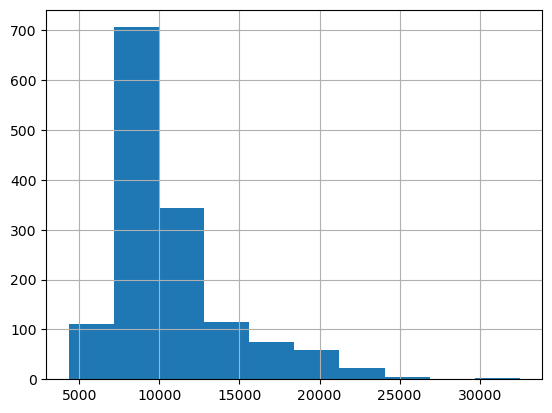

In [9]:
# Creating Bar chart as the Target variable is Continuous
%matplotlib inline
dataset['Price'].hist()

Based on the basic data analysis above, there are six categorical predictors in the data.

Categorical Predictors:
'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

In [10]:
# Plotting multiple bar charts at once
def BarChartsPlotter(inputData, columnsToPlot):
    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows = 1, ncols = len(columnsToPlot), figsize = (25,5))
    fig.suptitle('Bar charts of: '+ str(columnsToPlot))

    for colName, plotNumber in zip(columnsToPlot, range(len(columnsToPlot))):
        inputData.groupby(colName).size().plot(kind = 'bar',ax = subPlot[plotNumber])

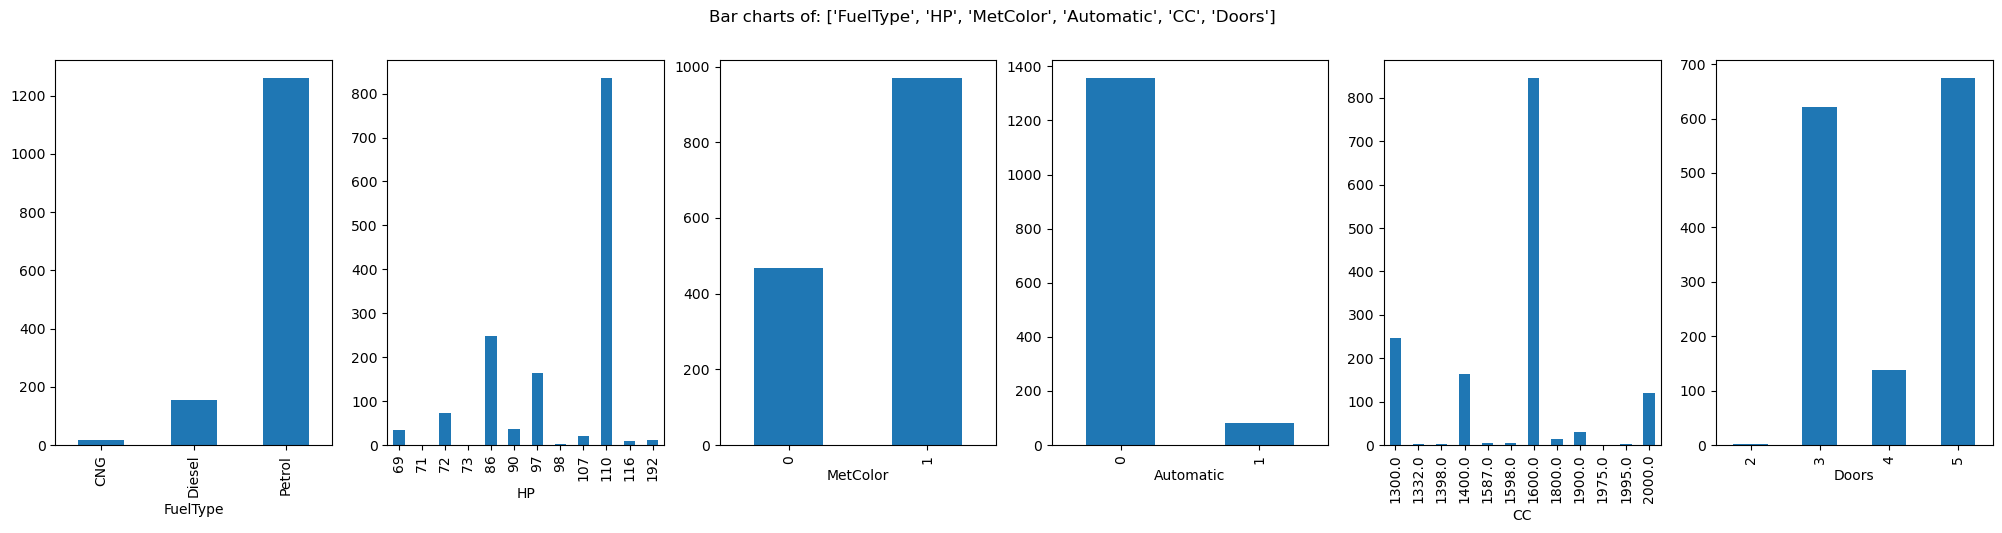

In [11]:
BarChartsPlotter(inputData = dataset, columnsToPlot=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'])

##### Histogram Interpretation
Based on the data analysis there are 3 continuous predictor variables: 'Age', 'KM', and 'Weight'.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'KM'}>],
       [<AxesSubplot:title={'center':'Weight'}>, <AxesSubplot:>]],
      dtype=object)

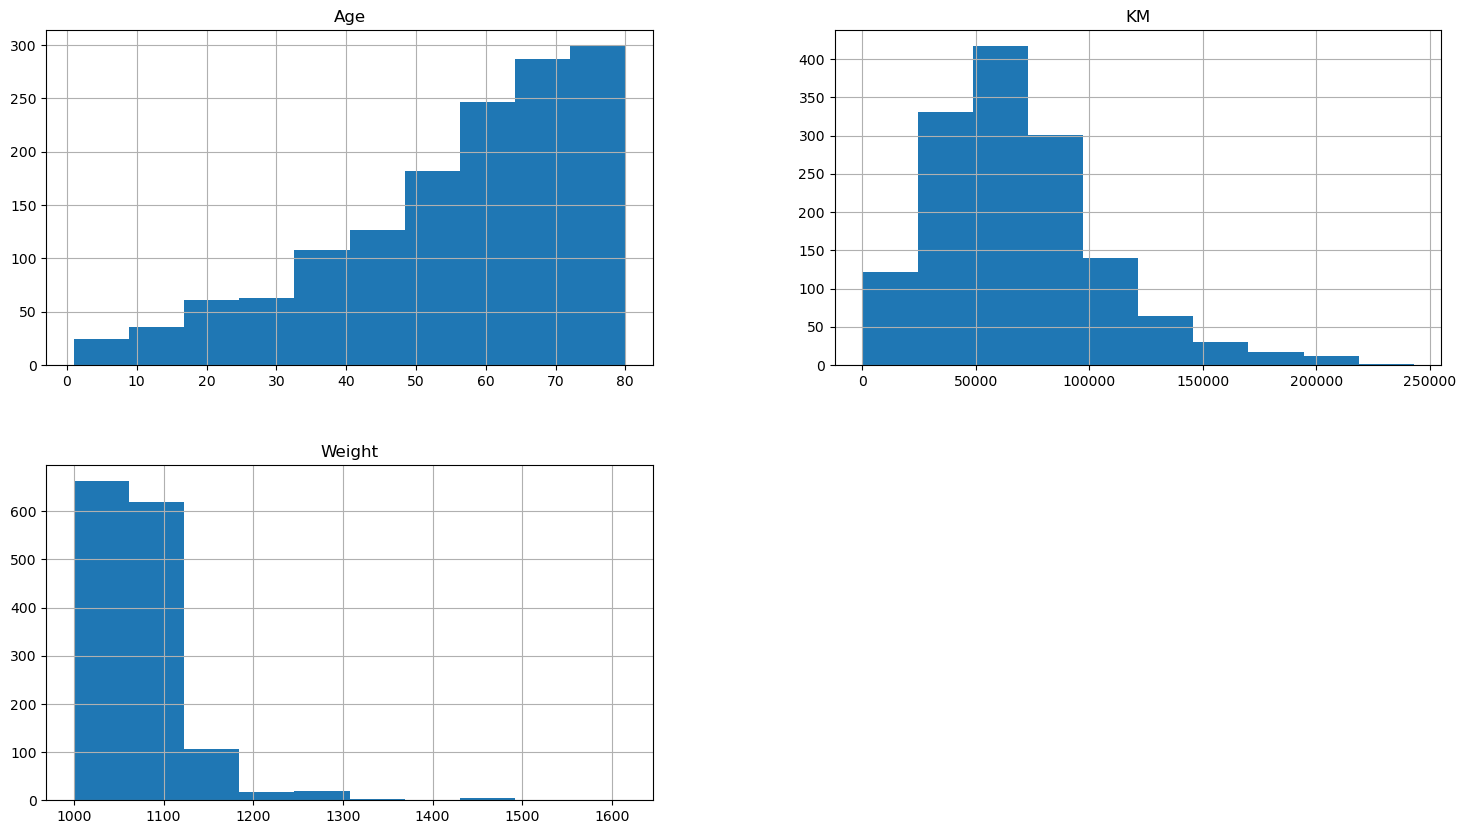

In [12]:
# Plotting histograms of multiple columns together
dataset.hist(['Age','KM','Weight'], figsize=(18,10))

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 300 rows in data that has a value between 70 to 80.

Selected Continuous Variables:

Age, KM, Weight.

Lets look for missing values and treat them if they are missing

In [13]:
# so yes they are missing values
dataset.isnull().values.any()

True

In [14]:
dataset.isnull().sum().sum()

10

The columns fuel type, age, cc (engine size), and weight has missing values. 

In [15]:
# Finding how many missing values are there for each column
dataset.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [16]:
# Treating missing values of categorical variable with MODE value
dataset['FuelType'].fillna(value=dataset['FuelType'].mode()[0], inplace=True)
dataset['CC'].fillna(value=dataset['CC'].mode()[0], inplace=True)

In [17]:
# Treating missing values of continuous variable with Median value
dataset['Weight'].fillna(value=dataset['Weight'].median(), inplace=True)
dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True)

In [18]:
# Checking missing values again after the treatment
dataset.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [19]:
df = dataset
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [20]:
df.shape

(1436, 10)

###  Feature Selection Methods
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://www.sciencedirect.com/topics/computer-science/pearson-correlation#:~:text=The%20Pearson%20correlation%20measures%20the,meaning%20a%20total%20positive%20correlation.

Now we will choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values.

#### Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

#### Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
Continuous Target Variable Vs Continuous Predictor
Continuous Target Variable Vs Categorical Predictor

#### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

##### Scatter charts interpretation

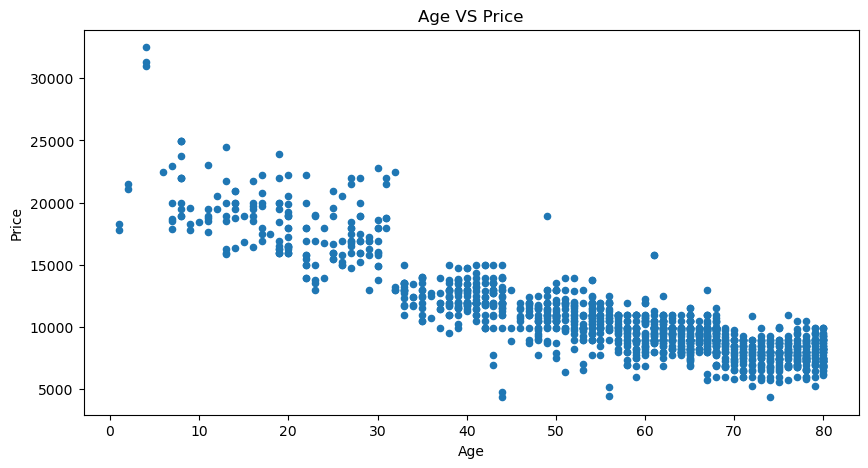

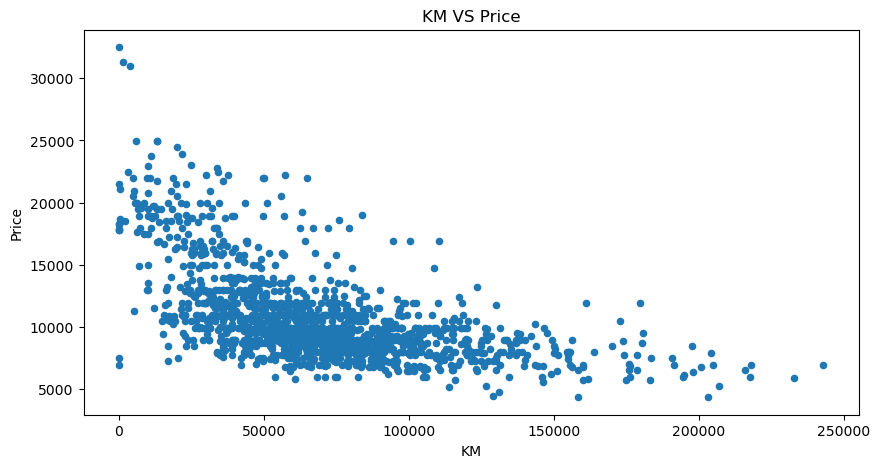

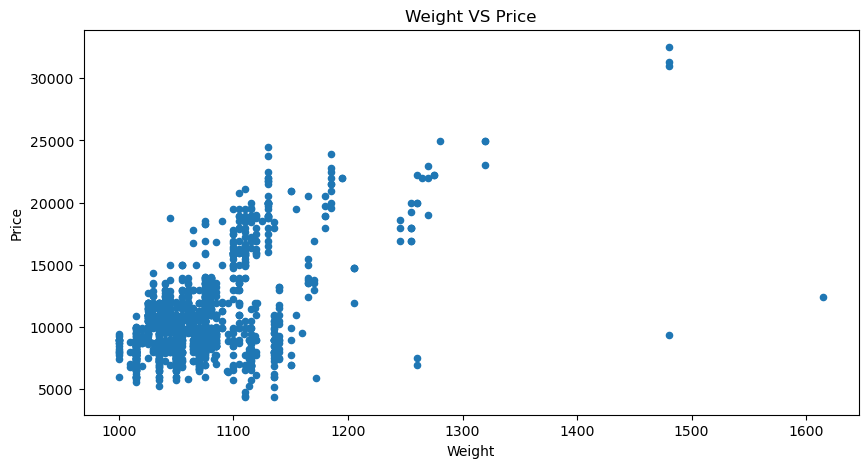

In [21]:
ContinuousColumns=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousColumns:
    df.plot.scatter(x = predictor, y = 'Price', figsize = (10,5), title = predictor+" VS "+ 'Price')

What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: They are directly proportional to each other, if one value increases, other also increases.

Decreasing Trend: They are inversely proportional to each other, if one value increases, other decreases.

No Trend: This means there is no correlation between the variables. 

We can see that they are some outliers in the weight x price scatter plot

#### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

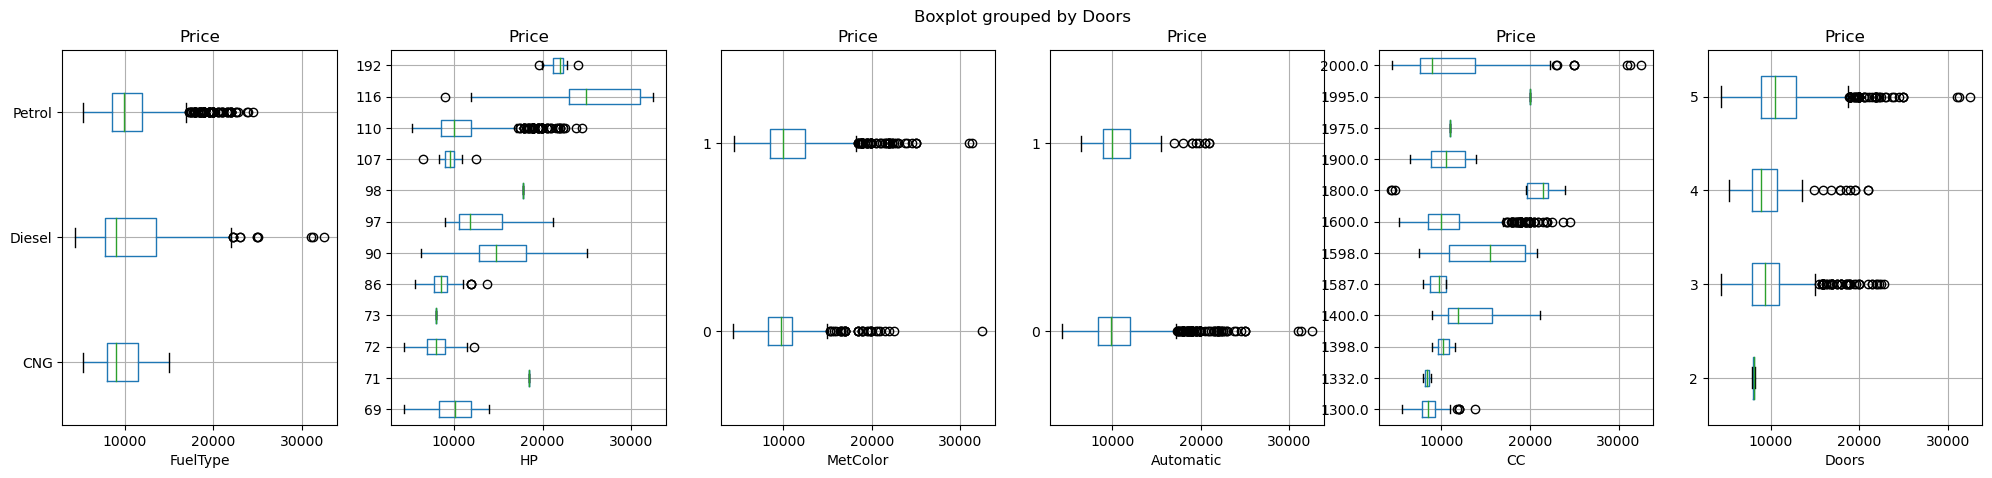

In [22]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=6, figsize=(24,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=False, ax=PlotCanvas[i])

What should you look for in these box plots?

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","MetColor", "Automatic" and possibly "Doors" they seems like a border cases, as the boxes are close to each other.

Lets look at the ANOVA test below to confirm my thoughts

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/

https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/full/10.1002/cem.3019#:~:text=ANOVA%20tables%20are%20sometimes%20produced,or%20parameter%20is%20not%20significant.

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inputData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inputData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inputData=df, TargetVariable='Price', CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is correlated with Price | P-Value: 0.044583699346313316
HP is correlated with Price | P-Value: 2.147973807158519e-112
MetColor is correlated with Price | P-Value: 3.5400828979534804e-05
Automatic is NOT correlated with Price | P-Value: 0.2102673589326726
CC is correlated with Price | P-Value: 3.931461326875801e-47
Doors is correlated with Price | P-Value: 5.605466564639052e-13


['FuelType', 'HP', 'MetColor', 'CC', 'Doors']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "Automatic". Fuel type and met color is correlated which is a bit strange if we take the boxplot into account.

Final selected Categorical columns:

'HP', 'MetColor', 'CC', 'Doors', 'FuelType'

In [25]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors', 'FuelType']

# Selecting final columns
data4dl=df[SelectedColumns]
data4dl.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,FuelType
0,23.0,46986,1165.0,90,1,2000.0,3,Diesel
1,23.0,72937,1165.0,90,1,2000.0,3,Diesel
2,24.0,41711,1165.0,90,1,2000.0,3,Diesel
3,26.0,48000,1165.0,90,0,2000.0,3,Diesel
4,30.0,38500,1170.0,90,0,2000.0,3,Diesel


In [26]:
# Saving this final data for reference during deployment
data4dl.to_pickle('data_for_deep_learing.pkl')

In [27]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(data4dl)

# Adding Target Variable to the data
DataForML_Numeric['Price']=dataset['Price']

# Printing sample rows
DataForML_Numeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price
0,23.0,46986,1165.0,90,1,2000.0,3,0,1,0,13500
1,23.0,72937,1165.0,90,1,2000.0,3,0,1,0,13750
2,24.0,41711,1165.0,90,1,2000.0,3,0,1,0,13950
3,26.0,48000,1165.0,90,0,2000.0,3,0,1,0,14950
4,30.0,38500,1170.0,90,0,2000.0,3,0,1,0,13750


##### Standardizing
Lets standardize the data. Based on research this is a common practice for neural networks.

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In [30]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
 
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)

##### Splitting data
Splitting the data into 80% training and 20% testing data

In [31]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1148, 10)
(1148, 1)
(288, 10)
(288, 1)


### Model Building

Define parameters:

* units=5: This means we are creating a layer with five neurons in it. 

* input_dim=10: This means there are seven predictors in the input data which is expected by the first layer. 

* kernel_initializer=’normal’: When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.

* activation=’relu’: This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.

* batch_size=20: This specifies how many rows will be passed to the Network.

* Epochs=50: In simple terms, the ANN looks at the full training data 50 times and adjusts its weights.

https://datascience.aero/aviation-function-deep-learning/

In [33]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create model
model = Sequential()
 
# Defining the input layer
model.add(Dense(units=5, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the hidden layer
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    
# Defining the output layer
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Using TensorFlow backend.
2022-09-18 21:27:53.957977: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-18 21:27:53.958446: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50
1148/1148 [==============================] - 0s 345us/step - loss: 0.9930
Epoch 2/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.9418
Epoch 3/50
1148/1148 [==============================] - 0s 57us/step - loss: 0.7675
Epoch 4/50
1148/1148 [==============================] - 0s 58us/step - loss: 0.5911
Epoch 5/50
1148/1148 [==============================] - 0s 61us/step - loss: 0.4476
Epoch 6/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.3258
Epoch 7/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.2392
Epoch 8/50
1148/1148 [==============================] - 0s 60us/step - loss: 0.1864
Epoch 9/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.1570
Epoch 10/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.1423
Epoch 11/50
1148/1148 [==============================] - 0s 59us/step - loss: 0.1342
Epoch 12/50
1148/1148 [==============================] - 0s 60us/step - l

### Model Evaluation

##### Searching for the best hyperparameters

Finding the best values for batch_size and epoch is very important, this can have serious consequences for the performance of the model. There is no magic rule which can help you to decide the number of layers and epochs, you just have to play around and see what works best.

https://betterdatascience.com/3-ways-to-tune-hyperparameters/

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide

In [34]:
# A loop based approach
# Defining a function to find the best parameters
def function_find_best_params(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [35]:
# Results:
ResultsData = function_find_best_params(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 62.815904593787245
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 63.82703764002336
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 75.11623717123254
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 74.46972123294289
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 59.37149484240961
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 60.830322462984974
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 82.44612362338718
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 72.566623599674
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 61.92867301960473
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 84.31379636835466
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 60.765902419538776
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 68.57344706864853
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 64.63811512867161
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 58.152033361775494
15 Parameters: bat

##### Visualizing the results of parameter trials for the model

<AxesSubplot:xlabel='Parameters'>

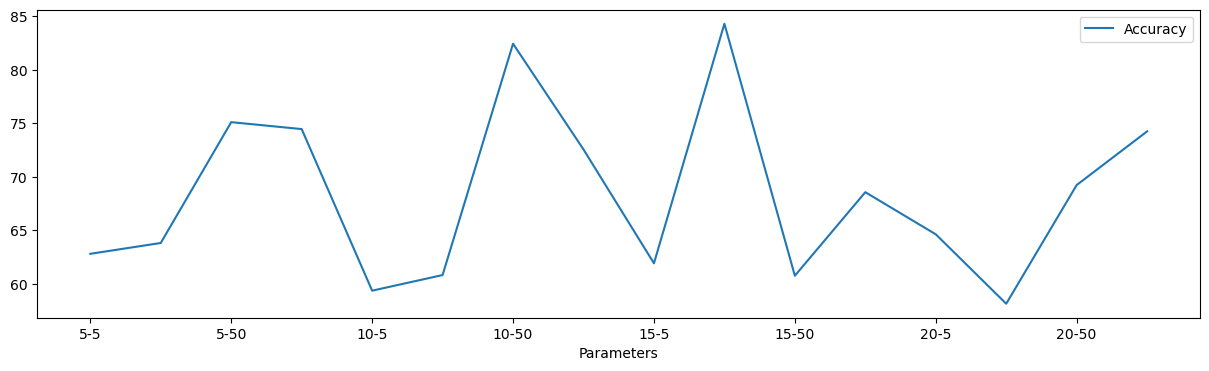

In [36]:
# Plot results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

This graph shows that the best set of parameters are in the area of batch_size=15 and epochs=10. Next step is to train the model with these parameters.

Next lets train the model with the hyperparams we just found.

In [37]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 10, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,50.0,22500.0,1025.0,97.0,1.0,1400.0,3.0,0.0,0.0,1.0,10800.0,10570.332031
1,68.0,80426.0,1055.0,110.0,1.0,1600.0,3.0,0.0,0.0,1.0,9950.0,8870.111328
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,0.0,1.0,0.0,7500.0,8601.212891
3,71.0,76000.0,1070.0,110.0,1.0,1600.0,5.0,0.0,0.0,1.0,9250.0,8917.158203
4,65.0,59000.0,1075.0,110.0,0.0,1600.0,5.0,0.0,0.0,1.0,9750.0,9724.739258


The mean absolute percentage error (MAPE) is the most common measure used to forecast error, probably because the variable’s units are scaled to percentage units, which makes it easier to understand.

https://www.statisticshowto.com/mean-absolute-percentage-error-mape/

https://www.askpython.com/python/examples/mape-mean-absolute-percentage-error

In [45]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.63026516846861


,Age,KM,Weight,HP,MetColor,CC,Doors,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,50.0,22500.0,1025.0,97.0,1.0,1400.0,3.0,0.0,0.0,1.0,10800.0,10570.332031,2.126555
1,68.0,80426.0,1055.0,110.0,1.0,1600.0,3.0,0.0,0.0,1.0,9950.0,8870.111328,10.853152
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,0.0,1.0,0.0,7500.0,8601.212891,14.682839
3,71.0,76000.0,1070.0,110.0,1.0,1600.0,5.0,0.0,0.0,1.0,9250.0,8917.158203,3.598290
4,65.0,59000.0,1075.0,110.0,0.0,1600.0,5.0,0.0,0.0,1.0,9750.0,9724.739258,0.259085


##### Finding best hyperparameters using GridSearchCV.

The methods above to find the best params are more manual but we can laso use Grid Search to find the best params which is widely used in model evaluation.

In [46]:
# Function to generate model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [50]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[5, 10, 20, 30], 'epochs':[5, 10, 15, 20], 'Optimizer_trial':['adam', 'rmsprop']}

# Creating the regression model
RegressionModel = KerasRegressor(make_regression_ann, verbose=0)


In [51]:
# Creating the Grid search space
grid_search=GridSearchCV(estimator = RegressionModel, param_grid=Parameter_Trials, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X, y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')


Epoch 1/5

   5/1149 [..............................] - ETA: 2:02 - loss: 0.4053Epoch 1/10

   5/1148 [..............................] - ETA: 1:53 - loss: 0.6584Epoch 1/5

   5/1149 [..............................] - ETA: 1:54 - loss: 0.2097Epoch 1/5

  60/1148 [>.............................] - ETA: 9s - loss: 0.3286  Epoch 1/5

  75/1149 [>.............................] - ETA: 8s - loss: 1.7485  Epoch 1/10

 100/1149 [=>............................] - ETA: 6s - loss: 1.4372 Epoch 1/10

   5/1149 [..............................] - ETA: 2:12 - loss: 0.6518Epoch 1/5

1149/1149 [==============================] - 1s 1ms/step - loss: 0.9655
Epoch 2/5

1149/1149 [==============================] - 1s 1ms/step - loss: 1.0778

1148/1148 [==============================] - 1s 1ms/step - loss: 0.2693

1149/1149 [==============================] - 1s 1ms/step - loss: 1.0481
Epoch 2/5

   5/1149 [..............................] - ETA: 0s - loss: 4.2076Epoch 2/10

   5/1148 [.........................

1148/1148 [==============================] - 2s 1ms/step - loss: 0.2919

 390/1149 [=========>....................] - ETA: 0s - loss: 0.5455Epoch 2/5

1148/1148 [==============================] - 1s 548us/step - loss: 0.1183
Epoch 3/10

1149/1149 [==============================] - 1s 576us/step - loss: 0.3265
Epoch 3/5

1149/1149 [==============================] - 1s 624us/step - loss: 0.3970

1115/1149 [============================>.] - ETA: 0s - loss: 0.3035Epoch 3/5

1149/1149 [==============================] - 1s 609us/step - loss: 0.2964
Epoch 3/5

1149/1149 [==============================] - 1s 564us/step - loss: 0.4910
Epoch 3/10

1149/1149 [==============================] - 1s 596us/step - loss: 0.8887
Epoch 3/5

1149/1149 [==============================] - 1s 579us/step - loss: 0.2272
Epoch 3/10

1148/1148 [==============================] - 1s 603us/step - loss: 0.1239
Epoch 3/5

 370/1149 [========>.....................] - ETA: 0s - loss: 0.7688


1148/1148 [==============================] - 1s 587us/step - loss: 0.0935

1149/1149 [==============================] - 1s 561us/step - loss: 0.1694

1095/1149 [===========================>..] - ETA: 0s - loss: 0.1753Epoch 4/10

 745/1148 [==================>...........] - ETA: 0s - loss: 0.0872Epoch 4/5

1149/1149 [==============================] - 1s 563us/step - loss: 0.1728
Epoch 4/5

1149/1149 [==============================] - 1s 566us/step - loss: 0.1365
Epoch 4/5

1149/1149 [==============================] - 1s 566us/step - loss: 0.1798
Epoch 4/10

1149/1149 [==============================] - 1s 562us/step - loss: 0.1448
Epoch 4/10

1149/1149 [==============================] - 1s 598us/step - loss: 0.7595
Epoch 4/5

1148/1148 [==============================] - 1s 572us/step - loss: 0.0897
Epoch 4/5

 815/1149 [====================>.........] - ETA: 0s - loss: 0.1607


1148/1148 [==============================] - 1s 542us/step - loss: 0.0872

1005/1149 [=========================>....] - ETA: 0s - loss: 0.1440Epoch 5/10

1149/1149 [==============================] - 1s 533us/step - loss: 0.1364
Epoch 5/5

1149/1149 [==============================] - 1s 560us/step - loss: 0.1579
Epoch 5/5

1149/1149 [==============================] - 1s 559us/step - loss: 0.1376

1030/1149 [=========================>....] - ETA: 0s - loss: 0.6692Epoch 5/10

1149/1149 [==============================] - 1s 571us/step - loss: 0.1269
Epoch 5/5

1149/1149 [==============================] - 1s 555us/step - loss: 0.1350
Epoch 5/10

1149/1149 [==============================] - 1s 557us/step - loss: 0.6741
Epoch 5/5

1148/1148 [==============================] - 1s 602us/step - loss: 0.0840
Epoch 5/5

1148/1148 [==============================] - 1s 567us/step - loss: 0.0854

1055/1149 [==========================>...] - ETA: 0s - loss: 0.1467Epoch 6/10

1149/1149 [================

1149/1149 [==============================] - 1s 588us/step - loss: 0.1510

1149/1149 [==============================] - 1s 561us/step - loss: 0.1256
Epoch 6/10

1149/1149 [==============================] - 1s 583us/step - loss: 0.1234

1149/1149 [==============================] - 1s 543us/step - loss: 0.1307
Epoch 6/10

1149/1149 [==============================] - 1s 562us/step - loss: 0.6059

1148/1148 [==============================] - 1s 544us/step - loss: 0.0820

1148/1148 [==============================] - 1s 469us/step - loss: 0.0846

 975/1149 [========================>.....] - ETA: 0s - loss: 0.1244Epoch 7/10

1149/1149 [==============================] - 1s 501us/step - loss: 0.1208
Epoch 7/10

1149/1149 [==============================] - 1s 479us/step - loss: 0.1278
Epoch 7/10

 405/1149 [=========>....................] - ETA: 0s - loss: 0.1188Epoch 1/10

  40/1149 [>.............................] - ETA: 15s - loss: 0.7325 Epoch 1/10

  95/1149 [=>............................]

1148/1148 [==============================] - 1s 1ms/step - loss: 0.0842
Epoch 8/10

1045/1149 [==========================>...] - ETA: 0s - loss: 0.1282Epoch 1/15

1149/1149 [==============================] - 1s 1ms/step - loss: 0.1176
Epoch 8/10

1149/1149 [==============================] - 1s 1ms/step - loss: 0.1260
Epoch 8/10

 965/1149 [========================>.....] - ETA: 0s - loss: 1.0685


1149/1149 [==============================] - 2s 2ms/step - loss: 1.0204
Epoch 2/10

1149/1149 [==============================] - 2s 2ms/step - loss: 1.0116

1060/1149 [==========================>...] - ETA: 0s - loss: 1.0700Epoch 2/10

1148/1148 [==============================] - 3s 2ms/step - loss: 0.2659
Epoch 2/15

1149/1149 [==============================] - 3s 2ms/step - loss: 1.0724
Epoch 2/15

1148/1148 [==============================] - 1s 1ms/step - loss: 0.0838
Epoch 9/10

1149/1149 [==============================] - 1s 1ms/step - loss: 0.1146
Epoch 9/10

1149/1149 [==============================] - 1s 1ms/step - loss: 0.1254
Epoch 9/10

1149/1149 [==============================] - 3s 2ms/step - loss: 0.9940
Epoch 2/15

 185/1149 [===>..........................] - ETA: 0s - loss: 0.1257


1149/1149 [==============================] - 1s 658us/step - loss: 0.7331
Epoch 3/10

1149/1149 [==============================] - 1s 657us/step - loss: 0.3200
Epoch 3/10

1148/1148 [==============================] - 1s 589us/step - loss: 0.1380
Epoch 3/15

1149/1149 [==============================] - 1s 620us/step - loss: 0.8413
Epoch 3/15

1149/1149 [==============================] - 1s 553us/step - loss: 0.1140

1148/1148 [==============================] - 1s 592us/step - loss: 0.0825
Epoch 10/10

   5/1149 [..............................] - ETA: 0s - loss: 0.0308Epoch 10/10

1149/1149 [==============================] - 1s 572us/step - loss: 0.2200

1149/1149 [==============================] - 1s 579us/step - loss: 0.1236
Epoch 3/15

   5/1149 [..............................] - ETA: 0s - loss: 0.4036Epoch 10/10

 560/1148 [=============>................] - ETA: 0s - loss: 0.0850


1149/1149 [==============================] - 1s 542us/step - loss: 0.5505
Epoch 4/10

1148/1148 [==============================] - 1s 546us/step - loss: 0.1112
Epoch 4/15

1149/1149 [==============================] - 1s 584us/step - loss: 0.1402
Epoch 4/10

1149/1149 [==============================] - 1s 544us/step - loss: 0.7440

 110/1148 [=>............................] - ETA: 0s - loss: 0.1091Epoch 4/15

1149/1149 [==============================] - 1s 543us/step - loss: 0.1109

1148/1148 [==============================] - 1s 547us/step - loss: 0.0824

1149/1149 [==============================] - 1s 523us/step - loss: 0.1403

 455/1148 [==========>...................] - ETA: 0s - loss: 0.1147Epoch 4/15

1149/1149 [==============================] - 1s 557us/step - loss: 0.1227

1149/1149 [==============================] - 1s 517us/step - loss: 0.4158
Epoch 5/10

1149/1149 [==============================] - 1s 483us/step - loss: 0.1291
Epoch 5/10

1148/1148 [==========================

1149/1149 [==============================] - 1s 538us/step - loss: 0.3246
Epoch 6/10

1149/1149 [==============================] - 1s 537us/step - loss: 0.1269
Epoch 6/10

1149/1149 [==============================] - 1s 509us/step - loss: 0.5991
Epoch 6/15

1148/1148 [==============================] - 1s 563us/step - loss: 0.0965

 800/1149 [===================>..........] - ETA: 0s - loss: 0.1275Epoch 6/15

 460/1149 [===========>..................] - ETA: 1s - loss: 1.0631Epoch 1/20

1149/1149 [==============================] - 1s 577us/step - loss: 0.1329
Epoch 6/15

1149/1149 [==============================] - 1s 981us/step - loss: 1.0067

 415/1149 [=========>....................] - ETA: 0s - loss: 0.1312Epoch 2/15

1149/1149 [==============================] - 1s 549us/step - loss: 0.2647

 865/1148 [=====================>........] - ETA: 0s - loss: 0.0960Epoch 7/10

 970/1149 [========================>.....] - ETA: 0s - loss: 0.5642


1149/1149 [==============================] - 1s 1ms/step - loss: 0.9691

 630/1149 [===============>..............] - ETA: 0s - loss: 0.1325Epoch 2/15

1149/1149 [==============================] - 1s 553us/step - loss: 0.1242

 100/1149 [=>............................] - ETA: 0s - loss: 0.2242Epoch 7/10

1149/1149 [==============================] - 1s 598us/step - loss: 0.5432
Epoch 7/15

1148/1148 [==============================] - 1s 600us/step - loss: 0.0925
Epoch 7/15

1149/1149 [==============================] - 1s 528us/step - loss: 0.1296
Epoch 7/15

1148/1148 [==============================] - 1s 1ms/step - loss: 0.2542
Epoch 2/20

1149/1149 [==============================] - 1s 547us/step - loss: 0.2883

 910/1149 [======================>.......] - ETA: 0s - loss: 0.3883Epoch 3/15

1149/1149 [==============================] - 1s 551us/step - loss: 0.2260
Epoch 8/10

1149/1149 [==============================] - 1s 572us/step - loss: 0.3694
Epoch 3/15

1149/1149 [===============

1149/1149 [==============================] - 1s 565us/step - loss: 0.1268

 765/1149 [==================>...........] - ETA: 0s - loss: 0.1516Epoch 8/15

1148/1148 [==============================] - 1s 565us/step - loss: 0.1212

 540/1148 [=============>................] - ETA: 0s - loss: 0.0898Epoch 3/20

1149/1149 [==============================] - 1s 531us/step - loss: 0.1568
Epoch 4/15

1149/1149 [==============================] - 1s 543us/step - loss: 0.1994

 685/1148 [================>.............] - ETA: 0s - loss: 0.0887Epoch 9/10

1149/1149 [==============================] - 1s 546us/step - loss: 0.1229
Epoch 9/10

1149/1149 [==============================] - 1s 586us/step - loss: 0.2299
Epoch 4/15

1149/1149 [==============================] - 1s 537us/step - loss: 0.4502

 745/1149 [==================>...........] - ETA: 0s - loss: 0.1337Epoch 9/15

1148/1148 [==============================] - 1s 575us/step - loss: 0.0886
Epoch 9/15

1149/1149 [=============================

1149/1149 [==============================] - 1s 536us/step - loss: 0.1351
Epoch 5/15

1148/1148 [==============================] - 1s 568us/step - loss: 0.1073
Epoch 4/20

1149/1149 [==============================] - 1s 546us/step - loss: 0.1820
Epoch 10/10

1149/1149 [==============================] - 1s 556us/step - loss: 0.1223
Epoch 10/10

1149/1149 [==============================] - 1s 535us/step - loss: 0.4108

 735/1149 [==================>...........] - ETA: 0s - loss: 0.1247Epoch 10/15

1149/1149 [==============================] - 1s 586us/step - loss: 0.1948

 485/1149 [===========>..................] - ETA: 0s - loss: 0.1164Epoch 5/15

1148/1148 [==============================] - 1s 553us/step - loss: 0.0867
Epoch 10/15

1149/1149 [==============================] - 1s 557us/step - loss: 0.1242
Epoch 10/15

1149/1149 [==============================] - 1s 537us/step - loss: 0.1293

 620/1149 [===============>..............] - ETA: 0s - loss: 0.1871Epoch 6/15

1148/1148 [======

1149/1149 [==============================] - 1s 562us/step - loss: 0.1192

1149/1149 [==============================] - 1s 557us/step - loss: 0.3774

 915/1148 [======================>.......] - ETA: 0s - loss: 0.0876Epoch 11/15

1149/1149 [==============================] - 1s 569us/step - loss: 0.1807
Epoch 6/15

1148/1148 [==============================] - 1s 567us/step - loss: 0.0859
Epoch 11/15

1149/1149 [==============================] - 1s 519us/step - loss: 0.1221
Epoch 11/15

1149/1149 [==============================] - 1s 506us/step - loss: 0.1254
Epoch 7/15

1148/1148 [==============================] - 1s 527us/step - loss: 0.0951
Epoch 6/20

1149/1149 [==============================] - 1s 501us/step - loss: 0.3488

 415/1148 [=========>....................] - ETA: 0s - loss: 0.0887Epoch 12/15

1149/1149 [==============================] - 1s 560us/step - loss: 0.1680
Epoch 7/15

1148/1148 [==============================] - 1s 519us/step - loss: 0.0851
Epoch 12/15

1045/1149 

1148/1148 [==============================] - 1s 516us/step - loss: 0.0914
Epoch 7/20

1149/1149 [==============================] - 1s 570us/step - loss: 0.1219
Epoch 8/15

 295/1148 [======>.......................] - ETA: 0s - loss: 0.0846Epoch 1/20

1149/1149 [==============================] - 1s 507us/step - loss: 0.3240
Epoch 13/15

1149/1149 [==============================] - 1s 545us/step - loss: 0.1603

 695/1148 [=================>............] - ETA: 0s - loss: 0.0931Epoch 8/15

1148/1148 [==============================] - 1s 566us/step - loss: 0.0847

1145/1149 [============================>.] - ETA: 0s - loss: 0.1191Epoch 13/15

1149/1149 [==============================] - 1s 494us/step - loss: 0.1188
Epoch 13/15

1148/1148 [==============================] - 1s 516us/step - loss: 0.0898

1149/1149 [==============================] - 1s 488us/step - loss: 0.1207
Epoch 8/20

   5/1148 [..............................] - ETA: 0s - loss: 0.1518Epoch 9/15

1149/1149 [===============

1149/1149 [==============================] - 1s 530us/step - loss: 0.3021
Epoch 14/15

1149/1149 [==============================] - 1s 531us/step - loss: 0.1533
Epoch 9/15

1149/1149 [==============================] - 1s 1ms/step - loss: 1.0178

 700/1149 [=================>............] - ETA: 0s - loss: 0.6248Epoch 2/20

1148/1148 [==============================] - 1s 563us/step - loss: 0.0834
Epoch 14/15

1149/1149 [==============================] - 1s 581us/step - loss: 0.1199
Epoch 14/15

1149/1149 [==============================] - 1s 550us/step - loss: 0.1186
Epoch 10/15

1148/1148 [==============================] - 1s 581us/step - loss: 0.0871
Epoch 9/20

1149/1149 [==============================] - 1s 589us/step - loss: 0.5577
Epoch 3/20

1149/1149 [==============================] - 1s 575us/step - loss: 0.2834
Epoch 15/15

 540/1149 [=============>................] - ETA: 0s - loss: 0.0996


1149/1149 [==============================] - 1s 578us/step - loss: 0.1494

 930/1148 [=======================>......] - ETA: 0s - loss: 0.0850Epoch 10/15

1149/1149 [==============================] - 1s 549us/step - loss: 0.2605
Epoch 3/20

1149/1149 [==============================] - 1s 571us/step - loss: 0.1183

 935/1149 [=======================>......] - ETA: 0s - loss: 0.1168Epoch 15/15

1148/1148 [==============================] - 1s 625us/step - loss: 0.0828

 920/1148 [=======================>......] - ETA: 0s - loss: 0.0802Epoch 15/15

1149/1149 [==============================] - 1s 574us/step - loss: 0.1167
Epoch 11/15

1148/1148 [==============================] - 1s 612us/step - loss: 0.0855
Epoch 10/20

1149/1149 [==============================] - 1s 590us/step - loss: 0.2260
Epoch 4/20

1149/1149 [==============================] - 1s 598us/step - loss: 0.2684

1149/1149 [==============================] - 1s 603us/step - loss: 0.1403
Epoch 4/20

1149/1149 [=================

1149/1149 [==============================] - 1s 620us/step - loss: 0.1173

1148/1148 [==============================] - 1s 616us/step - loss: 0.0824

1149/1149 [==============================] - 1s 606us/step - loss: 0.1149
Epoch 12/15

1148/1148 [==============================] - 1s 564us/step - loss: 0.0838
Epoch 11/20

1149/1149 [==============================] - 1s 589us/step - loss: 0.1498
Epoch 5/20

1149/1149 [==============================] - 1s 537us/step - loss: 0.1313
Epoch 5/20

1149/1149 [==============================] - 1s 550us/step - loss: 0.1457
Epoch 12/15

1149/1149 [==============================] - 1s 509us/step - loss: 0.1144
Epoch 13/15

 960/1149 [========================>.....] - ETA: 0s - loss: 0.1451Epoch 1/20

1148/1148 [==============================] - 1s 529us/step - loss: 0.0835
Epoch 12/20

1149/1149 [==============================] - 1s 534us/step - loss: 0.1367
Epoch 6/20

  80/1149 [=>............................] - ETA: 0s - loss: 0.1857Epoch 1/20


1149/1149 [==============================] - 1s 522us/step - loss: 0.1267
Epoch 6/20

1149/1149 [==============================] - 1s 530us/step - loss: 0.1416
Epoch 13/15

 675/1149 [================>.............] - ETA: 0s - loss: 0.1493Epoch 1/5

1149/1149 [==============================] - 1s 525us/step - loss: 0.1119

 900/1149 [======================>.......] - ETA: 0s - loss: 1.0034Epoch 14/15

1148/1148 [==============================] - 1s 516us/step - loss: 0.0826
Epoch 13/20

1149/1149 [==============================] - 1s 538us/step - loss: 0.1323
Epoch 7/20

1149/1149 [==============================] - 1s 1ms/step - loss: 0.9502
Epoch 2/20

1148/1148 [==============================] - 1s 744us/step - loss: 0.3319

 195/1149 [====>.........................] - ETA: 0s - loss: 0.1169Epoch 2/5

1149/1149 [==============================] - 1s 1ms/step - loss: 0.9135

1149/1149 [==============================] - 1s 576us/step - loss: 0.1263
Epoch 2/20

   5/1149 [..............

Epoch 14/15

1148/1148 [==============================] - 0s 332us/step - loss: 0.1727
Epoch 3/5

1149/1149 [==============================] - 1s 542us/step - loss: 0.1123

 300/1149 [======>.......................] - ETA: 0s - loss: 0.1555Epoch 15/15

1148/1148 [==============================] - 1s 548us/step - loss: 0.0816
Epoch 14/20

1149/1149 [==============================] - 1s 549us/step - loss: 0.2235

 235/1149 [=====>........................] - ETA: 0s - loss: 0.0988Epoch 3/20

1149/1149 [==============================] - 1s 580us/step - loss: 0.1313
Epoch 8/20

1148/1148 [==============================] - 0s 309us/step - loss: 0.1025
Epoch 4/5

1149/1149 [==============================] - 1s 589us/step - loss: 0.1237
Epoch 8/20

1149/1149 [==============================] - 1s 595us/step - loss: 0.1373
Epoch 15/15

1149/1149 [==============================] - 1s 618us/step - loss: 0.2603
Epoch 3/20

1070/1148 [==========================>...] - ETA: 0s - loss: 0.0907


1148/1148 [==============================] - 0s 288us/step - loss: 0.0898

1145/1149 [============================>.] - ETA: 0s - loss: 0.1091Epoch 5/5

1149/1149 [==============================] - 1s 589us/step - loss: 0.1089

1148/1148 [==============================] - 1s 578us/step - loss: 0.0804

 320/1149 [=======>......................] - ETA: 0s - loss: 0.1359Epoch 15/20

1149/1149 [==============================] - 1s 572us/step - loss: 0.1547

 205/1148 [====>.........................] - ETA: 0s - loss: 0.0858Epoch 4/20

1149/1149 [==============================] - 1s 572us/step - loss: 0.1281
Epoch 9/20

1148/1148 [==============================] - 0s 275us/step - loss: 0.0847

1149/1149 [==============================] - 1s 565us/step - loss: 0.1332

1149/1149 [==============================] - 1s 567us/step - loss: 0.1659

 565/1149 [=============>................] - ETA: 0s - loss: 0.1350Epoch 4/20

1149/1149 [==============================] - 1s 601us/step - loss: 0.1222

 495/1149 [===========>..................] - ETA: 0s - loss: 0.1593Epoch 1/5

1149/1149 [==============================] - 1s 634us/step - loss: 0.1556
Epoch 5/20

1149/1149 [==============================] - 1s 648us/step - loss: 0.1198
Epoch 10/20

1148/1148 [==============================] - 1s 536us/step - loss: 0.0796
Epoch 17/20

1090/1149 [===========================>..] - ETA: 0s - loss: 0.1409Epoch 1/5

1149/1149 [==============================] - 1s 517us/step - loss: 0.1422
Epoch 6/20

 200/1148 [====>.........................] - ETA: 0s - loss: 0.0653Epoch 1/5

1149/1149 [==============================] - 1s 545us/step - loss: 0.1264
Epoch 11/20

1149/1149 [==============================] - 1s 1ms/step - loss: 1.1556
Epoch 2/5

1149/1149 [==============================] - 1s 487us/step - loss: 0.1490

 465/1149 [===========>..................] - ETA: 0s - loss: 0.1054Epoch 6/20

1149/1149 [==============================] - 1s 521us/step - loss: 0.1176
Epoch 11/20



1149/1149 [==============================] - 0s 231us/step - loss: 0.7654
Epoch 3/5

1149/1149 [==============================] - 1s 842us/step - loss: 1.1448

1148/1148 [==============================] - 1s 516us/step - loss: 0.0796
Epoch 2/5

  10/1149 [..............................] - ETA: 0s - loss: 1.1782Epoch 18/20

1149/1149 [==============================] - 1s 522us/step - loss: 0.1372

 680/1149 [================>.............] - ETA: 0s - loss: 0.2679Epoch 7/20

1149/1149 [==============================] - 1s 888us/step - loss: 1.1043

 650/1149 [===============>..............] - ETA: 0s - loss: 0.1447Epoch 2/5

1149/1149 [==============================] - 1s 510us/step - loss: 0.1239
Epoch 12/20

1149/1149 [==============================] - 0s 284us/step - loss: 0.2211

 365/1148 [========>.....................] - ETA: 0s - loss: 0.0983Epoch 4/5

1149/1149 [==============================] - 0s 285us/step - loss: 0.6893

 790/1149 [===================>..........] - ETA: 0s 

1149/1149 [==============================] - 1s 556us/step - loss: 0.1338
Epoch 8/20

1149/1149 [==============================] - 0s 282us/step - loss: 0.2058
Epoch 4/5

1149/1149 [==============================] - 0s 269us/step - loss: 0.1301

1149/1149 [==============================] - 1s 556us/step - loss: 0.1234

 315/1148 [=======>......................] - ETA: 0s - loss: 0.0749Epoch 13/20

1149/1149 [==============================] - 0s 285us/step - loss: 0.1672

 280/1149 [======>.......................] - ETA: 0s - loss: 0.1126Epoch 5/5

1149/1149 [==============================] - 1s 543us/step - loss: 0.1407
Epoch 8/20

1149/1149 [==============================] - 0s 276us/step - loss: 0.1440
Epoch 5/5

1149/1149 [==============================] - 1s 554us/step - loss: 0.1159
Epoch 13/20

1148/1148 [==============================] - 1s 524us/step - loss: 0.0789
Epoch 20/20

1149/1149 [==============================] - 0s 265us/step - loss: 0.1467

1149/1149 [===============

1149/1149 [==============================] - 1s 530us/step - loss: 0.1369
Epoch 9/20

1149/1149 [==============================] - 1s 533us/step - loss: 0.1147
Epoch 14/20

 945/1148 [=======================>......] - ETA: 0s - loss: 0.0775Epoch 1/5

1148/1148 [==============================] - 1s 591us/step - loss: 0.0784

1149/1149 [==============================] - 1s 511us/step - loss: 0.1296
Epoch 10/20

1149/1149 [==============================] - 1s 527us/step - loss: 0.1199

 650/1149 [===============>..............] - ETA: 0s - loss: 0.1359Epoch 15/20

 205/1149 [====>.........................] - ETA: 0s - loss: 0.1497Epoch 1/10

1149/1149 [==============================] - 1s 672us/step - loss: 1.0738
Epoch 2/5

1149/1149 [==============================] - 1s 552us/step - loss: 0.1340
Epoch 10/20

1149/1149 [==============================] - 1s 510us/step - loss: 0.1126
Epoch 15/20

 900/1149 [======================>.......] - ETA: 0s - loss: 0.8336Epoch 1/10

1148/1148 [====

1149/1149 [==============================] - 1s 533us/step - loss: 0.1189

 360/1149 [========>.....................] - ETA: 1s - loss: 1.2382Epoch 16/20

 440/1149 [==========>...................] - ETA: 1s - loss: 1.2289Epoch 1/10

1148/1148 [==============================] - 0s 273us/step - loss: 0.1589
Epoch 3/10

1149/1149 [==============================] - 0s 275us/step - loss: 0.4282
Epoch 4/5

1149/1149 [==============================] - 1s 816us/step - loss: 1.1537

 420/1149 [=========>....................] - ETA: 0s - loss: 0.2313Epoch 2/10

1149/1149 [==============================] - 1s 528us/step - loss: 0.1297
Epoch 11/20

1149/1149 [==============================] - 1s 509us/step - loss: 0.1117
Epoch 16/20

1148/1148 [==============================] - 0s 260us/step - loss: 0.1287

1149/1149 [==============================] - 0s 255us/step - loss: 0.2231
Epoch 5/5

  10/1149 [..............................] - ETA: 0s - loss: 0.1174Epoch 4/10

1149/1149 [=================

1149/1149 [==============================] - 0s 268us/step - loss: 0.1646

1148/1148 [==============================] - 0s 280us/step - loss: 0.1131

 640/1149 [===============>..............] - ETA: 0s - loss: 0.9621Epoch 5/10

1149/1149 [==============================] - 1s 521us/step - loss: 0.1267
Epoch 12/20

1149/1149 [==============================] - 0s 249us/step - loss: 0.8047
Epoch 3/10

1149/1149 [==============================] - 1s 565us/step - loss: 0.1126

 610/1148 [==============>...............] - ETA: 0s - loss: 0.1150Epoch 17/20

1149/1149 [==============================] - 0s 258us/step - loss: 0.2255
Epoch 4/10

1148/1148 [==============================] - 0s 267us/step - loss: 0.1058

 365/1149 [========>.....................] - ETA: 0s - loss: 0.1320Epoch 6/10

1149/1149 [==============================] - 1s 535us/step - loss: 0.1250
Epoch 13/20

1149/1149 [==============================] - 0s 288us/step - loss: 0.3361
Epoch 4/10

1149/1149 [===================

1149/1149 [==============================] - 0s 293us/step - loss: 0.1268
Epoch 6/10

1148/1148 [==============================] - 0s 233us/step - loss: 0.0984

 590/1149 [==============>...............] - ETA: 0s - loss: 0.1478Epoch 8/10

1149/1149 [==============================] - 1s 554us/step - loss: 0.1237

 190/1148 [===>..........................] - ETA: 0s - loss: 0.1052Epoch 14/20

1149/1149 [==============================] - 0s 266us/step - loss: 0.1394

 600/1149 [==============>...............] - ETA: 0s - loss: 1.1445Epoch 6/10

1149/1149 [==============================] - 0s 274us/step - loss: 0.1244

1149/1149 [==============================] - 1s 553us/step - loss: 0.1157

 780/1149 [===================>..........] - ETA: 0s - loss: 0.1237Epoch 7/10

  10/1149 [..............................] - ETA: 0s - loss: 0.1052Epoch 19/20

1148/1148 [==============================] - 0s 277us/step - loss: 0.0959
Epoch 9/10

1149/1149 [==============================] - 1s 778us/st

Epoch 3/10

1149/1149 [==============================] - 0s 266us/step - loss: 0.1249
Epoch 8/10

1149/1149 [==============================] - 1s 562us/step - loss: 0.1137
Epoch 20/20

1149/1149 [==============================] - 0s 288us/step - loss: 0.1190
Epoch 9/10

1148/1148 [==============================] - 0s 285us/step - loss: 0.0928

1149/1149 [==============================] - 0s 262us/step - loss: 0.1813

 420/1149 [=========>....................] - ETA: 0s - loss: 0.1184Epoch 4/10

1149/1149 [==============================] - 1s 555us/step - loss: 0.1215

 660/1149 [================>.............] - ETA: 0s - loss: 0.1106Epoch 15/20

1149/1149 [==============================] - 1s 575us/step - loss: 0.1080
Epoch 20/20

1149/1149 [==============================] - 0s 275us/step - loss: 0.1209
Epoch 9/10

1149/1149 [==============================] - 0s 268us/step - loss: 0.1186
Epoch 10/10

1149/1149 [==============================] - 1s 555us/step - loss: 0.1215
Epoch 16/20

1149/1149 [==============================] - 0s 281us/step - loss: 0.1175

1149/1149 [==============================] - 0s 261us/step - loss: 0.1492
Epoch 6/10

1149/1149 [==============================] - 1s 549us/step - loss: 0.1202
Epoch 16/20

1149/1149 [==============================] - 1s 518us/step - loss: 0.1081

1149/1149 [==============================] - 0s 257us/step - loss: 0.1151

1050/1149 [==========================>...] - ETA: 0s - loss: 0.1457Epoch 1/10

1149/1149 [==============================] - 1s 519us/step - loss: 0.1209
Epoch 17/20

1149/1149 [==============================] - 0s 262us/step - loss: 0.1429

 490/1149 [===========>..................] - ETA: 0s - loss: 0.1137Epoch 7/10

1149/1149 [==============================] - 0s 274us/step - loss: 0.1364

1070/1149 [==========================>...] - ETA: 0s - loss: 0.1148Epoch 8/10

1149/1149 [==============================] - 1s 794us/step - loss: 1.0836
Epoch 2/10

 625/1149 [===============>..............]

1149/1149 [==============================] - 0s 283us/step - loss: 0.1302

1040/1149 [==========================>...] - ETA: 0s - loss: 0.2934Epoch 10/10

1149/1149 [==============================] - 1s 521us/step - loss: 0.1178
Epoch 18/20

1149/1149 [==============================] - 0s 300us/step - loss: 0.2846
Epoch 4/10

1149/1149 [==============================] - 1s 750us/step - loss: 1.1616
Epoch 2/15

1148/1148 [==============================] - 1s 792us/step - loss: 0.3200

 690/1149 [=================>............] - ETA: 0s - loss: 0.1363Epoch 2/15

1149/1149 [==============================] - 1s 789us/step - loss: 1.1220

1149/1149 [==============================] - 0s 309us/step - loss: 0.6346
Epoch 2/15

  10/1149 [..............................] - ETA: 0s - loss: 1.4924Epoch 3/15

1149/1149 [==============================] - 0s 264us/step - loss: 0.1288

1149/1149 [==============================] - 0s 286us/step - loss: 0.1723
Epoch 5/10

1149/1149 [====================

1148/1148 [==============================] - 0s 258us/step - loss: 0.1335
Epoch 4/15

1149/1149 [==============================] - 0s 269us/step - loss: 0.4747

 400/1149 [=========>....................] - ETA: 0s - loss: 0.2021Epoch 4/15

1149/1149 [==============================] - 0s 290us/step - loss: 0.1728
Epoch 5/15

1149/1149 [==============================] - 0s 275us/step - loss: 0.3948
Epoch 5/15

1149/1149 [==============================] - 0s 283us/step - loss: 0.1532
Epoch 7/10

1149/1149 [==============================] - 1s 575us/step - loss: 0.1191

 660/1149 [================>.............] - ETA: 0s - loss: 0.1096Epoch 20/20

1148/1148 [==============================] - 0s 291us/step - loss: 0.1166
Epoch 5/15

1149/1149 [==============================] - 0s 280us/step - loss: 0.2248
Epoch 5/15

1149/1149 [==============================] - 0s 292us/step - loss: 0.1624
Epoch 6/15

 920/1149 [=======================>......] - ETA: 0s - loss: 0.2264Epoch 1/15

1149/1149 

1149/1149 [==============================] - 0s 256us/step - loss: 0.1526

 610/1149 [==============>...............] - ETA: 0s - loss: 0.1542Epoch 7/15

1149/1149 [==============================] - 1s 530us/step - loss: 0.1195

1149/1149 [==============================] - 0s 272us/step - loss: 0.1468
Epoch 9/10

1148/1148 [==============================] - 0s 272us/step - loss: 0.1024
Epoch 7/15

1149/1149 [==============================] - 0s 253us/step - loss: 0.1379

 410/1149 [=========>....................] - ETA: 0s - loss: 0.1379Epoch 7/15

1149/1149 [==============================] - 0s 276us/step - loss: 0.1502
Epoch 8/15

1149/1149 [==============================] - 1s 967us/step - loss: 1.0561

 760/1149 [==================>...........] - ETA: 0s - loss: 0.1374Epoch 2/15

1149/1149 [==============================] - 1s 528us/step - loss: 0.1155

1149/1149 [==============================] - 0s 269us/step - loss: 0.1317
Epoch 8/15

1149/1149 [==============================] -


1050/1149 [==========================>...] - ETA: 0s - loss: 0.3244Epoch 9/15

1149/1149 [==============================] - 0s 283us/step - loss: 0.1419

1149/1149 [==============================] - 0s 290us/step - loss: 0.3177
Epoch 4/15

  10/1149 [..............................] - ETA: 0s - loss: 0.2267Epoch 10/15

1149/1149 [==============================] - 0s 274us/step - loss: 0.1235

 730/1149 [==================>...........] - ETA: 0s - loss: 0.1333Epoch 10/15

1148/1148 [==============================] - 0s 270us/step - loss: 0.0934
Epoch 10/15

1149/1149 [==============================] - 0s 265us/step - loss: 0.1268
Epoch 10/15

1149/1149 [==============================] - 0s 261us/step - loss: 0.1397
Epoch 11/15

1149/1149 [==============================] - 0s 280us/step - loss: 0.1911
Epoch 5/15

 390/1149 [=========>....................] - ETA: 0s - loss: 0.2032Epoch 1/20

1149/1149 [==============================] - 0s 276us/step - loss: 0.1219
Epoch 11/15

1148/1148 [

1149/1149 [==============================] - 1s 437us/step - loss: 0.1189
Epoch 13/15

1090/1148 [===========================>..] - ETA: 0s - loss: 0.0895Epoch 1/20

1148/1148 [==============================] - 1s 449us/step - loss: 0.0891
Epoch 13/15

1148/1148 [==============================] - 1s 492us/step - loss: 0.1599
Epoch 3/20

1149/1149 [==============================] - 1s 499us/step - loss: 0.1235

 510/1149 [============>.................] - ETA: 0s - loss: 0.1400Epoch 13/15

1149/1149 [==============================] - 1s 472us/step - loss: 0.1329

1149/1149 [==============================] - 1s 1ms/step - loss: 1.1839
Epoch 2/20

1149/1149 [==============================] - 1s 495us/step - loss: 0.1464
Epoch 14/15

  10/1149 [..............................] - ETA: 0s - loss: 0.1483Epoch 8/15

1149/1149 [==============================] - 0s 360us/step - loss: 0.1192
Epoch 14/15

1148/1148 [==============================] - 0s 333us/step - loss: 0.0880

 660/1149 [========

1149/1149 [==============================] - 2s 1ms/step - loss: 1.1165

 920/1149 [=======================>......] - ETA: 0s - loss: 0.9987Epoch 2/20

1149/1149 [==============================] - 0s 346us/step - loss: 0.1430

1148/1148 [==============================] - 0s 366us/step - loss: 0.1088
Epoch 9/15

  10/1149 [..............................] - ETA: 0s - loss: 0.0484Epoch 4/20

1149/1149 [==============================] - 0s 381us/step - loss: 0.1229

1090/1149 [===========================>..] - ETA: 0s - loss: 0.9498Epoch 14/15

1149/1149 [==============================] - 0s 389us/step - loss: 0.9284
Epoch 3/20

1149/1149 [==============================] - 0s 402us/step - loss: 0.1317
Epoch 15/15

1149/1149 [==============================] - 0s 317us/step - loss: 0.1177
Epoch 15/15

1148/1148 [==============================] - 0s 302us/step - loss: 0.0865
Epoch 15/15

1149/1149 [==============================] - 0s 296us/step - loss: 0.5907
Epoch 3/20

1149/1149 [=========

1149/1149 [==============================] - 1s 490us/step - loss: 0.1380
Epoch 11/15

1149/1149 [==============================] - 1s 514us/step - loss: 0.3123
Epoch 4/20

1148/1148 [==============================] - 1s 509us/step - loss: 0.0860

 560/1149 [=============>................] - ETA: 0s - loss: 0.1690Epoch 6/20

1149/1149 [==============================] - 1s 517us/step - loss: 0.1220

1149/1149 [==============================] - 1s 557us/step - loss: 0.1718

 690/1149 [=================>............] - ETA: 0s - loss: 0.2479Epoch 5/20

1149/1149 [==============================] - 0s 286us/step - loss: 0.1368
Epoch 12/15

1149/1149 [==============================] - 0s 298us/step - loss: 0.2518
Epoch 5/20

1148/1148 [==============================] - 0s 305us/step - loss: 0.0829
Epoch 7/20

1149/1149 [==============================] - 0s 285us/step - loss: 0.1563
Epoch 6/20

1149/1149 [==============================] - 0s 294us/step - loss: 0.1359

1080/1149 [=============

1149/1149 [==============================] - 1s 720us/step - loss: 1.0702

 360/1148 [========>.....................] - ETA: 0s - loss: 0.3473Epoch 2/20

1149/1149 [==============================] - 0s 266us/step - loss: 0.1474

 660/1148 [================>.............] - ETA: 0s - loss: 0.3227Epoch 8/20

1149/1149 [==============================] - 1s 632us/step - loss: 1.1806
Epoch 2/5

1149/1149 [==============================] - 0s 273us/step - loss: 0.1833

1149/1149 [==============================] - 0s 270us/step - loss: 0.1330
Epoch 8/20

 990/1148 [========================>.....] - ETA: 0s - loss: 0.0800Epoch 15/15

1148/1148 [==============================] - 0s 181us/step - loss: 0.2904

 430/1149 [==========>...................] - ETA: 0s - loss: 0.1792Epoch 3/5

1149/1149 [==============================] - 0s 265us/step - loss: 0.8540

1148/1148 [==============================] - 0s 259us/step - loss: 0.0799
Epoch 3/20

  10/1149 [..............................] - ETA: 0s

1149/1149 [==============================] - 0s 148us/step - loss: 0.5322
Epoch 5/5

1148/1148 [==============================] - 0s 155us/step - loss: 0.1289

1149/1149 [==============================] - 0s 307us/step - loss: 0.1430
Epoch 10/20

1149/1149 [==============================] - 0s 300us/step - loss: 0.3580
Epoch 4/20

1149/1149 [==============================] - 0s 141us/step - loss: 0.2894

1149/1149 [==============================] - 0s 277us/step - loss: 0.1603
Epoch 10/20

1148/1148 [==============================] - 0s 275us/step - loss: 0.0790
Epoch 12/20

1149/1149 [==============================] - 0s 317us/step - loss: 0.1780
Epoch 5/20

1149/1149 [==============================] - 0s 265us/step - loss: 0.1415
Epoch 11/20

1149/1149 [==============================] - 0s 283us/step - loss: 0.1895
Epoch 5/20

1149/1149 [==============================] - 0s 375us/step - loss: 0.1531

 250/1149 [=====>........................] - ETA: 0s - loss: 0.1832Epoch 11/20

1148

1149/1149 [==============================] - 0s 373us/step - loss: 0.1467
Epoch 12/20

1149/1149 [==============================] - 1s 655us/step - loss: 1.1736

 500/1149 [============>.................] - ETA: 0s - loss: 1.1145Epoch 2/5

1148/1148 [==============================] - 0s 280us/step - loss: 0.0787
Epoch 14/20

 680/1149 [================>.............] - ETA: 0s - loss: 1.1463Epoch 1/5

1149/1149 [==============================] - 0s 254us/step - loss: 0.1448
Epoch 7/20

1149/1149 [==============================] - 1s 733us/step - loss: 1.1333
Epoch 2/5

1149/1149 [==============================] - 0s 158us/step - loss: 1.0871
Epoch 3/5

1149/1149 [==============================] - 0s 251us/step - loss: 0.1377

 970/1149 [========================>.....] - ETA: 0s - loss: 0.1402Epoch 13/20

1149/1149 [==============================] - 0s 265us/step - loss: 0.1336
Epoch 7/20

1149/1149 [==============================] - 0s 262us/step - loss: 0.1410

 360/1149 [========>...

1149/1149 [==============================] - 0s 179us/step - loss: 1.0016

1148/1148 [==============================] - 0s 246us/step - loss: 0.0785

 420/1149 [=========>....................] - ETA: 0s - loss: 0.1003Epoch 16/20

 320/1149 [=======>......................] - ETA: 0s - loss: 0.5929Epoch 3/5

1149/1149 [==============================] - 0s 302us/step - loss: 0.1374
Epoch 14/20

1149/1149 [==============================] - 0s 193us/step - loss: 0.5549
Epoch 5/5

1149/1149 [==============================] - 0s 305us/step - loss: 0.1353
Epoch 9/20

1149/1149 [==============================] - 0s 164us/step - loss: 0.1797

1149/1149 [==============================] - 0s 155us/step - loss: 0.6929
Epoch 4/5

1149/1149 [==============================] - 0s 293us/step - loss: 0.1257
Epoch 9/20

1149/1149 [==============================] - 0s 304us/step - loss: 0.1352

 450/1149 [==========>...................] - ETA: 0s - loss: 0.1078Epoch 15/20

1149/1149 [======================

1149/1149 [==============================] - 0s 327us/step - loss: 0.1307
Epoch 11/20

1149/1149 [==============================] - 0s 284us/step - loss: 0.1328
Epoch 17/20

1149/1149 [==============================] - 0s 291us/step - loss: 0.1204
Epoch 11/20

 200/1149 [====>.........................] - ETA: 0s - loss: 0.0937Epoch 1/10

1148/1148 [==============================] - 0s 298us/step - loss: 0.0777

 300/1148 [======>.......................] - ETA: 1s - loss: 0.3660 Epoch 19/20

1149/1149 [==============================] - 0s 294us/step - loss: 0.1295
Epoch 17/20

  10/1149 [..............................] - ETA: 0s - loss: 0.1214Epoch 1/10

1149/1149 [==============================] - 0s 256us/step - loss: 0.1289
Epoch 12/20

1148/1148 [==============================] - 1s 544us/step - loss: 0.3613
Epoch 2/10

1149/1149 [==============================] - 0s 265us/step - loss: 0.1191
Epoch 12/20

1149/1149 [==============================] - 0s 285us/step - loss: 0.1322
Epoc

1148/1148 [==============================] - 0s 147us/step - loss: 0.1337
Epoch 5/10

1149/1149 [==============================] - 0s 124us/step - loss: 0.9821
Epoch 4/10

 970/1149 [========================>.....] - ETA: 0s - loss: 0.1190Epoch 1/10

1149/1149 [==============================] - 0s 312us/step - loss: 0.1262
Epoch 14/20

1149/1149 [==============================] - 0s 262us/step - loss: 0.1153
Epoch 14/20

1148/1148 [==============================] - 0s 125us/step - loss: 0.1226
Epoch 6/10

1149/1149 [==============================] - 0s 260us/step - loss: 0.1312
Epoch 20/20

1149/1149 [==============================] - 0s 234us/step - loss: 0.6630

 600/1148 [==============>...............] - ETA: 0s - loss: 0.1123Epoch 5/10

1149/1149 [==============================] - 0s 374us/step - loss: 0.1242

 880/1148 [=====================>........] - ETA: 0s - loss: 0.1172Epoch 20/20

1148/1148 [==============================] - 0s 230us/step - loss: 0.1155
Epoch 7/10

1149/11

1149/1149 [==============================] - 0s 150us/step - loss: 0.1283
Epoch 8/10

1149/1149 [==============================] - 0s 199us/step - loss: 0.9634
Epoch 4/10

1149/1149 [==============================] - 0s 331us/step - loss: 0.1251
Epoch 16/20

1149/1149 [==============================] - 0s 321us/step - loss: 0.1116
Epoch 16/20

1148/1148 [==============================] - 0s 169us/step - loss: 0.1039
Epoch 10/10

1149/1149 [==============================] - 0s 153us/step - loss: 0.1239
Epoch 9/10

1149/1149 [==============================] - 0s 173us/step - loss: 0.7119
Epoch 5/10

1148/1148 [==============================] - 0s 126us/step - loss: 0.1015

 970/1149 [========================>.....] - ETA: 0s - loss: 0.1280Epoch 1/10

1149/1149 [==============================] - 0s 142us/step - loss: 0.1226
Epoch 10/10

1149/1149 [==============================] - 0s 284us/step - loss: 0.1233

1080/1149 [===========================>..] - ETA: 0s - loss: 0.1044Epoch 17/20


1149/1149 [==============================] - 0s 137us/step - loss: 0.4363
Epoch 5/10

1148/1148 [==============================] - 0s 209us/step - loss: 0.3126
Epoch 3/15

1149/1149 [==============================] - 0s 252us/step - loss: 0.1086

 360/1149 [========>.....................] - ETA: 0s - loss: 0.2583Epoch 19/20

1149/1149 [==============================] - 0s 306us/step - loss: 0.1224
Epoch 19/20

1149/1149 [==============================] - 0s 141us/step - loss: 0.1671
Epoch 10/10

1149/1149 [==============================] - 0s 150us/step - loss: 0.2168

1120/1148 [============================>.] - ETA: 0s - loss: 0.2436Epoch 6/10

1149/1149 [==============================] - 0s 214us/step - loss: 0.9911

1148/1148 [==============================] - 0s 145us/step - loss: 0.2420

 370/1149 [========>.....................] - ETA: 0s - loss: 0.1233Epoch 3/10

  20/1149 [..............................] - ETA: 0s - loss: 0.5318Epoch 4/15

 480/1149 [===========>..............

1149/1149 [==============================] - 0s 145us/step - loss: 0.1539
Epoch 8/10

1148/1148 [==============================] - 0s 149us/step - loss: 0.0879

 880/1149 [=====================>........] - ETA: 0s - loss: 1.0349Epoch 9/15

1149/1149 [==============================] - 0s 164us/step - loss: 0.1497

1149/1149 [==============================] - 0s 168us/step - loss: 0.3953
Epoch 5/15

  20/1149 [..............................] - ETA: 0s - loss: 0.2425Epoch 1/15

1149/1149 [==============================] - 0s 188us/step - loss: 1.0000
Epoch 4/15

1149/1149 [==============================] - 0s 168us/step - loss: 0.1477
Epoch 9/10

1148/1148 [==============================] - 0s 168us/step - loss: 0.0865
Epoch 10/15

1149/1149 [==============================] - 0s 153us/step - loss: 0.2263
Epoch 6/15

1149/1149 [==============================] - 0s 150us/step - loss: 0.8887
Epoch 5/15

1149/1149 [==============================] - 1s 572us/step - loss: 1.1327
Epoch 2/15

114

1148/1148 [==============================] - 1s 633us/step - loss: 0.3606
Epoch 2/20

1148/1148 [==============================] - 0s 135us/step - loss: 0.0836
Epoch 14/15

1149/1149 [==============================] - 0s 132us/step - loss: 0.7176
Epoch 9/15

1149/1149 [==============================] - 0s 127us/step - loss: 0.1586
Epoch 10/15

 320/1148 [=======>......................] - ETA: 0s - loss: 0.3303Epoch 1/20

1149/1149 [==============================] - 0s 129us/step - loss: 0.2875
Epoch 6/15

1149/1149 [==============================] - 0s 184us/step - loss: 1.0699
Epoch 3/15

1148/1148 [==============================] - 0s 130us/step - loss: 0.0837
Epoch 15/15

1149/1149 [==============================] - 0s 132us/step - loss: 0.6870

1149/1149 [==============================] - 0s 130us/step - loss: 0.1550
Epoch 10/15

  20/1149 [..............................] - ETA: 0s - loss: 0.9868Epoch 11/15

1148/1148 [==============================] - 0s 162us/step - loss: 0.3016


1149/1149 [==============================] - 0s 133us/step - loss: 0.1444
Epoch 15/15

1149/1149 [==============================] - 0s 168us/step - loss: 0.7703
Epoch 7/15

1148/1148 [==============================] - 0s 123us/step - loss: 0.0932
Epoch 7/20

1149/1149 [==============================] - 0s 116us/step - loss: 0.1297
Epoch 11/15

1149/1149 [==============================] - 1s 734us/step - loss: 1.1713
Epoch 2/20

1149/1149 [==============================] - 0s 117us/step - loss: 0.8627
Epoch 5/20

1149/1149 [==============================] - 0s 132us/step - loss: 0.5638
Epoch 15/15

1149/1149 [==============================] - 0s 142us/step - loss: 0.1426

1149/1149 [==============================] - 0s 132us/step - loss: 0.7327

 560/1149 [=============>................] - ETA: 0s - loss: 0.9045Epoch 8/15

1148/1148 [==============================] - 0s 126us/step - loss: 0.0879
Epoch 8/20

1149/1149 [==============================] - 0s 110us/step - loss: 1.0947
Epoch 

1149/1149 [==============================] - 0s 150us/step - loss: 0.7078
Epoch 9/20

1149/1149 [==============================] - 0s 158us/step - loss: 0.2097

1148/1148 [==============================] - 0s 141us/step - loss: 0.0807
Epoch 6/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1538Epoch 12/20

1149/1149 [==============================] - 0s 142us/step - loss: 0.6198
Epoch 12/15

1149/1149 [==============================] - 0s 143us/step - loss: 0.1214

1149/1149 [==============================] - 0s 131us/step - loss: 0.6780
Epoch 10/20

1149/1149 [==============================] - 0s 195us/step - loss: 1.0359

 900/1149 [======================>.......] - ETA: 0s - loss: 0.1617Epoch 3/20

1149/1149 [==============================] - 0s 121us/step - loss: 0.1518
Epoch 7/20

1148/1148 [==============================] - 0s 138us/step - loss: 0.0806
Epoch 13/20

1149/1149 [==============================] - 0s 126us/step - loss: 0.5974
Epoch 13/15

1149/1149 

1148/1148 [==============================] - 0s 130us/step - loss: 0.0791

 620/1149 [===============>..............] - ETA: 0s - loss: 1.0363Epoch 17/20

1148/1148 [==============================] - 0s 116us/step - loss: 0.2164
Epoch 5/5

1149/1149 [==============================] - 0s 140us/step - loss: 0.1403
Epoch 8/20

1149/1149 [==============================] - 0s 159us/step - loss: 1.0469
Epoch 3/20

1149/1149 [==============================] - 0s 145us/step - loss: 0.5595

 740/1148 [==================>...........] - ETA: 0s - loss: 0.0768Epoch 15/20

1149/1149 [==============================] - 0s 157us/step - loss: 0.1254

1060/1148 [==========================>...] - ETA: 0s - loss: 0.0780Epoch 12/20

1148/1148 [==============================] - 0s 151us/step - loss: 0.0788
Epoch 18/20

1148/1148 [==============================] - 0s 105us/step - loss: 0.1701

1149/1149 [==============================] - 0s 141us/step - loss: 0.8820
Epoch 4/20

1149/1149 [===================

1149/1149 [==============================] - 0s 136us/step - loss: 0.1877
Epoch 8/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1809Epoch 1/5

 700/1149 [=================>............] - ETA: 0s - loss: 0.1281Epoch 1/5

1149/1149 [==============================] - 0s 113us/step - loss: 1.1218
Epoch 4/5

1149/1149 [==============================] - 0s 147us/step - loss: 0.4697

 360/1149 [========>.....................] - ETA: 0s - loss: 1.2490 Epoch 20/20

1149/1149 [==============================] - 0s 139us/step - loss: 0.1264
Epoch 13/20

1149/1149 [==============================] - 0s 133us/step - loss: 0.1179
Epoch 17/20

1149/1149 [==============================] - 0s 88us/step - loss: 1.0404
Epoch 5/5

1149/1149 [==============================] - 0s 128us/step - loss: 0.1721
Epoch 9/20

1149/1149 [==============================] - 0s 132us/step - loss: 0.1252

1050/1149 [==========================>...] - ETA: 0s - loss: 1.1830Epoch 14/20

1149/1149 [=======

1149/1149 [==============================] - 0s 177us/step - loss: 0.1463
Epoch 1/5

  30/1149 [..............................] - ETA: 13s - loss: 1.2034Epoch 13/20

1149/1149 [==============================] - 0s 176us/step - loss: 0.1234
Epoch 18/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1018Epoch 1/10

  30/1148 [..............................] - ETA: 12s - loss: 0.4757Epoch 1/10

1149/1149 [==============================] - 0s 430us/step - loss: 1.0975
Epoch 2/5

1149/1149 [==============================] - 0s 159us/step - loss: 0.1441
Epoch 14/20

1149/1149 [==============================] - 0s 152us/step - loss: 0.1224
Epoch 19/20

1149/1149 [==============================] - 0s 76us/step - loss: 1.0687
Epoch 3/5

1149/1149 [==============================] - 1s 471us/step - loss: 1.1887

 480/1149 [===========>..................] - ETA: 0s - loss: 0.1116Epoch 2/10

1148/1148 [==============================] - 1s 518us/step - loss: 0.3681

1149/1149 [=====

1149/1149 [==============================] - 0s 91us/step - loss: 1.1132
Epoch 3/10

1149/1149 [==============================] - 0s 148us/step - loss: 0.1364

 450/1149 [==========>...................] - ETA: 0s - loss: 1.0426Epoch 18/20

1149/1149 [==============================] - 1s 588us/step - loss: 1.0992
Epoch 2/10

1149/1149 [==============================] - 0s 100us/step - loss: 0.2758
Epoch 7/10

1148/1148 [==============================] - 0s 99us/step - loss: 0.1406
Epoch 7/10

1149/1149 [==============================] - 0s 114us/step - loss: 1.0539
Epoch 4/10

1149/1149 [==============================] - 0s 120us/step - loss: 1.0384
Epoch 4/10

1149/1149 [==============================] - 0s 95us/step - loss: 1.0807
Epoch 3/10

1149/1149 [==============================] - 0s 93us/step - loss: 0.1732
Epoch 8/10

1148/1148 [==============================] - 0s 86us/step - loss: 0.1300
Epoch 8/10

1149/1149 [==============================] - 0s 130us/step - loss: 0.1339
Ep

1149/1149 [==============================] - 1s 546us/step - loss: 1.1912

1149/1149 [==============================] - 0s 97us/step - loss: 0.3309
Epoch 2/15

  30/1149 [..............................] - ETA: 0s - loss: 1.2993Epoch 8/10

1149/1149 [==============================] - 0s 82us/step - loss: 0.3309
Epoch 7/10

1149/1149 [==============================] - 0s 89us/step - loss: 0.2421
Epoch 9/10

1149/1149 [==============================] - 0s 97us/step - loss: 0.2133

1149/1149 [==============================] - 0s 105us/step - loss: 0.2440
Epoch 9/10

  30/1149 [..............................] - ETA: 0s - loss: 0.1639Epoch 8/10

1148/1148 [==============================] - 0s 149us/step - loss: 0.3218
Epoch 3/15

1149/1149 [==============================] - 0s 115us/step - loss: 0.2065

 480/1149 [===========>..................] - ETA: 0s - loss: 0.2025Epoch 10/10

1149/1149 [==============================] - 0s 174us/step - loss: 1.1909
Epoch 3/15

1149/1149 [==============

1148/1148 [==============================] - 0s 97us/step - loss: 0.1197
Epoch 10/15

1149/1149 [==============================] - 0s 89us/step - loss: 1.0949

1149/1149 [==============================] - 0s 83us/step - loss: 0.5719
Epoch 10/15

  30/1149 [..............................] - ETA: 0s - loss: 0.6017Epoch 3/15

  30/1149 [..............................] - ETA: 0s - loss: 1.5010Epoch 1/20

1149/1149 [==============================] - 0s 102us/step - loss: 0.9763
Epoch 4/15

  30/1149 [..............................] - ETA: 0s - loss: 1.2805Epoch 1/20

1148/1148 [==============================] - 0s 86us/step - loss: 0.1138
Epoch 11/15

1149/1149 [==============================] - 0s 88us/step - loss: 0.4146

1149/1149 [==============================] - 0s 120us/step - loss: 1.1662
Epoch 11/15

  30/1149 [..............................] - ETA: 0s - loss: 0.3221Epoch 3/15

1149/1149 [==============================] - 0s 110us/step - loss: 0.9549
Epoch 4/15

 720/1148 [========

1149/1149 [==============================] - 0s 109us/step - loss: 0.1839
Epoch 9/15

1148/1148 [==============================] - 0s 105us/step - loss: 0.2224
Epoch 5/20

1149/1149 [==============================] - 0s 112us/step - loss: 0.1974

1149/1149 [==============================] - 0s 123us/step - loss: 0.2172
Epoch 8/15

1149/1149 [==============================] - 0s 90us/step - loss: 0.9265
Epoch 5/20

1149/1149 [==============================] - 0s 84us/step - loss: 1.0456
Epoch 4/20

1149/1149 [==============================] - 0s 100us/step - loss: 0.1440
Epoch 9/15

1149/1149 [==============================] - 0s 93us/step - loss: 0.1588
Epoch 10/15

1148/1148 [==============================] - 0s 96us/step - loss: 0.1740

 630/1149 [===============>..............] - ETA: 0s - loss: 0.7815Epoch 6/20

1149/1149 [==============================] - 0s 103us/step - loss: 0.1569
Epoch 9/15

1149/1149 [==============================] - 0s 124us/step - loss: 0.6780
Epoch 6/20



1149/1149 [==============================] - 0s 134us/step - loss: 0.2076
Epoch 8/20

1148/1148 [==============================] - 0s 105us/step - loss: 0.1245
Epoch 10/20

1149/1149 [==============================] - 0s 114us/step - loss: 0.1335
Epoch 13/15

1149/1149 [==============================] - 0s 89us/step - loss: 0.1367
Epoch 15/15

1149/1149 [==============================] - 0s 118us/step - loss: 0.1255

1110/1149 [===========================>..] - ETA: 0s - loss: 0.1355Epoch 14/15

1149/1149 [==============================] - 0s 82us/step - loss: 0.1670
Epoch 9/20

1149/1149 [==============================] - 0s 98us/step - loss: 0.1355
Epoch 10/20

1148/1148 [==============================] - 0s 83us/step - loss: 0.1199
Epoch 11/20

1149/1149 [==============================] - 0s 113us/step - loss: 0.1322

1149/1149 [==============================] - 0s 105us/step - loss: 0.1346
Epoch 14/15

1149/1149 [==============================] - 0s 94us/step - loss: 0.1237

 540/1

1149/1149 [==============================] - 0s 92us/step - loss: 0.1180
Epoch 17/20

1149/1149 [==============================] - 0s 105us/step - loss: 1.0203

  75/1148 [>.............................] - ETA: 6s - loss: 0.3795  Epoch 4/20

1149/1149 [==============================] - 0s 82us/step - loss: 0.1338
Epoch 16/20

1148/1148 [==============================] - 0s 83us/step - loss: 0.1006

 630/1149 [===============>..............] - ETA: 0s - loss: 0.9804Epoch 18/20

1149/1149 [==============================] - 0s 88us/step - loss: 0.6316
Epoch 6/20

1149/1149 [==============================] - 0s 85us/step - loss: 0.1174
Epoch 18/20

1149/1149 [==============================] - 0s 87us/step - loss: 0.8810
Epoch 5/20

 660/1148 [================>.............] - ETA: 0s - loss: 0.0948Epoch 1/5

1149/1149 [==============================] - 0s 88us/step - loss: 0.1328
Epoch 17/20

1148/1148 [==============================] - 0s 86us/step - loss: 0.0991
Epoch 19/20

1149/1149 [=

1149/1149 [==============================] - 0s 94us/step - loss: 0.1492
Epoch 14/20

1149/1149 [==============================] - 1s 976us/step - loss: 1.1094
Epoch 2/5

1149/1149 [==============================] - 0s 83us/step - loss: 0.1509
Epoch 13/20

1149/1149 [==============================] - 0s 95us/step - loss: 0.1433
Epoch 15/20

  30/1149 [..............................] - ETA: 0s - loss: 0.0740Epoch 1/5

1149/1149 [==============================] - 0s 78us/step - loss: 0.1421
Epoch 14/20

1149/1149 [==============================] - 1s 1ms/step - loss: 1.1121
Epoch 1/10

   5/1148 [..............................] - ETA: 1:06 - loss: 0.2293Epoch 2/5

1149/1149 [==============================] - 0s 92us/step - loss: 0.1391

  90/1149 [=>............................] - ETA: 4s - loss: 0.8119Epoch 16/20

1149/1149 [==============================] - 0s 99us/step - loss: 0.1382
Epoch 15/20

1148/1148 [==============================] - 1s 451us/step - loss: 0.1560
Epoch 3/5

1149

1148/1148 [==============================] - 1s 444us/step - loss: 0.1208
Epoch 4/5

1149/1149 [==============================] - 1s 839us/step - loss: 1.0878
Epoch 2/5

1149/1149 [==============================] - 0s 85us/step - loss: 0.1232

1148/1148 [==============================] - 1s 909us/step - loss: 0.2663
Epoch 2/10

1149/1149 [==============================] - 1s 439us/step - loss: 0.3223
Epoch 4/5

1149/1149 [==============================] - 1s 975us/step - loss: 1.0501
Epoch 2/5

1149/1149 [==============================] - 1s 467us/step - loss: 0.2880
Epoch 4/5

1035/1148 [==========================>...] - ETA: 0s - loss: 0.1066Epoch 1/10

1148/1148 [==============================] - 1s 450us/step - loss: 0.1039
Epoch 5/5

1149/1149 [==============================] - 1s 471us/step - loss: 0.7465

 355/1149 [========>.....................] - ETA: 0s - loss: 0.1958Epoch 3/5

  95/1149 [=>............................] - ETA: 4s - loss: 1.0913 Epoch 1/10

1148/1148 [=======

1149/1149 [==============================] - 1s 448us/step - loss: 0.7297
Epoch 3/5

1149/1149 [==============================] - 1s 467us/step - loss: 0.1680

 255/1149 [=====>........................] - ETA: 0s - loss: 0.5049Epoch 5/5

1149/1149 [==============================] - 0s 425us/step - loss: 0.3278
Epoch 4/5

1148/1148 [==============================] - 1s 467us/step - loss: 0.0970

1148/1148 [==============================] - 0s 435us/step - loss: 0.1101
Epoch 4/10

1149/1149 [==============================] - 1s 859us/step - loss: 1.1193
Epoch 2/10

1149/1149 [==============================] - 1s 443us/step - loss: 0.1376

1149/1149 [==============================] - 0s 409us/step - loss: 0.3786
Epoch 4/5

1149/1149 [==============================] - 1s 856us/step - loss: 1.1089
Epoch 2/10

1149/1149 [==============================] - 1s 466us/step - loss: 0.1403

1149/1149 [==============================] - 0s 419us/step - loss: 0.1731
Epoch 5/5

1090/1149 [=============

1148/1148 [==============================] - 0s 424us/step - loss: 0.0962

 860/1149 [=====================>........] - ETA: 0s - loss: 0.2348Epoch 5/10

1149/1149 [==============================] - 0s 424us/step - loss: 0.7896
Epoch 3/10

 205/1148 [====>.........................] - ETA: 0s - loss: 0.0852Epoch 1/10

1149/1149 [==============================] - 0s 428us/step - loss: 0.2176
Epoch 5/5

1149/1149 [==============================] - 1s 444us/step - loss: 0.7013
Epoch 3/10

1149/1149 [==============================] - 0s 427us/step - loss: 0.1428

 480/1149 [===========>..................] - ETA: 0s - loss: 0.4492Epoch 1/10

 820/1148 [====================>.........] - ETA: 0s - loss: 0.0885Epoch 1/15

1149/1149 [==============================] - 1s 465us/step - loss: 0.4670
Epoch 4/10

1148/1148 [==============================] - 1s 480us/step - loss: 0.0909

 885/1149 [======================>.......] - ETA: 0s - loss: 0.1557Epoch 6/10

1149/1149 [==========================

1148/1148 [==============================] - 0s 429us/step - loss: 0.0876

1149/1149 [==============================] - 1s 439us/step - loss: 0.2387

  40/1149 [>.............................] - ETA: 11s - loss: 0.9346 Epoch 7/10

   5/1148 [..............................] - ETA: 0s - loss: 0.0194Epoch 5/10

1149/1149 [==============================] - 1s 856us/step - loss: 0.9616

1148/1148 [==============================] - 1s 807us/step - loss: 0.2405
Epoch 2/15

   5/1148 [..............................] - ETA: 0s - loss: 0.0952Epoch 2/10

1149/1149 [==============================] - 0s 411us/step - loss: 0.8306

 240/1149 [=====>........................] - ETA: 0s - loss: 0.1892Epoch 3/10

1149/1149 [==============================] - 1s 444us/step - loss: 0.1869
Epoch 5/10

 415/1149 [=========>....................] - ETA: 0s - loss: 0.1511Epoch 1/15

1148/1148 [==============================] - 0s 431us/step - loss: 0.0855
Epoch 8/10

1149/1149 [==============================] - 

1149/1149 [==============================] - 1s 906us/step - loss: 1.1197
Epoch 2/15

1148/1148 [==============================] - 1s 451us/step - loss: 0.0840
Epoch 9/10

1149/1149 [==============================] - 1s 444us/step - loss: 0.1581
Epoch 7/10

1149/1149 [==============================] - 1s 460us/step - loss: 0.1773
Epoch 4/10

1148/1148 [==============================] - 1s 453us/step - loss: 0.1052
Epoch 4/15

1149/1149 [==============================] - 1s 459us/step - loss: 0.2278

 375/1149 [========>.....................] - ETA: 0s - loss: 0.8516Epoch 5/10

1149/1149 [==============================] - 1s 467us/step - loss: 0.1348

 230/1149 [=====>........................] - ETA: 0s - loss: 0.1321Epoch 7/10

1149/1149 [==============================] - 1s 452us/step - loss: 0.5435
Epoch 3/15

1149/1149 [==============================] - 1s 457us/step - loss: 0.7058
Epoch 3/15

1148/1148 [==============================] - 1s 445us/step - loss: 0.0831

1000/1148 [====

1149/1149 [==============================] - 1s 440us/step - loss: 0.1308

 340/1149 [=======>......................] - ETA: 0s - loss: 0.4263Epoch 8/10

1149/1149 [==============================] - 1s 462us/step - loss: 0.1522
Epoch 6/10

1149/1149 [==============================] - 1s 443us/step - loss: 0.1680
Epoch 4/15

1149/1149 [==============================] - 1s 451us/step - loss: 0.3070

 815/1149 [====================>.........] - ETA: 0s - loss: 0.1351Epoch 4/15

1148/1148 [==============================] - 1s 445us/step - loss: 0.0823

1149/1149 [==============================] - 1s 470us/step - loss: 0.1406

 915/1149 [======================>.......] - ETA: 0s - loss: 0.1382Epoch 9/10

1149/1149 [==============================] - 1s 459us/step - loss: 0.1506
Epoch 6/10

1148/1148 [==============================] - 1s 469us/step - loss: 0.0944

  90/1149 [=>............................] - ETA: 0s - loss: 0.1383Epoch 6/15

1149/1149 [==============================] - 1s 452

1149/1149 [==============================] - 1s 465us/step - loss: 0.2023
Epoch 5/15

1149/1149 [==============================] - 1s 462us/step - loss: 0.1359
Epoch 10/10

1149/1149 [==============================] - 1s 476us/step - loss: 0.1476

 150/1149 [==>...........................] - ETA: 0s - loss: 0.1882Epoch 7/10

1148/1148 [==============================] - 1s 469us/step - loss: 0.0913
Epoch 7/15

1149/1149 [==============================] - 1s 442us/step - loss: 0.1277
Epoch 8/10

1149/1149 [==============================] - 1s 455us/step - loss: 0.1264

1035/1149 [==========================>...] - ETA: 0s - loss: 0.1297Epoch 10/10

1149/1149 [==============================] - 1s 452us/step - loss: 0.1271
Epoch 6/15

 215/1149 [====>.........................] - ETA: 0s - loss: 0.1549Epoch 1/15

1149/1149 [==============================] - 1s 468us/step - loss: 0.1789
Epoch 6/15

1149/1149 [==============================] - 1s 455us/step - loss: 0.1318

1148/1148 [=========

1149/1149 [==============================] - 0s 421us/step - loss: 0.1213

 240/1149 [=====>........................] - ETA: 0s - loss: 0.1107Epoch 7/15

1149/1149 [==============================] - 0s 427us/step - loss: 0.1687

 900/1149 [======================>.......] - ETA: 0s - loss: 0.1325Epoch 7/15

1148/1148 [==============================] - 0s 418us/step - loss: 0.0883

1070/1149 [==========================>...] - ETA: 0s - loss: 0.1235Epoch 9/15

1149/1149 [==============================] - 1s 436us/step - loss: 0.1229
Epoch 10/10

1149/1149 [==============================] - 1s 967us/step - loss: 1.0496
Epoch 2/15

1149/1149 [==============================] - 1s 465us/step - loss: 0.1411
Epoch 9/10

1149/1149 [==============================] - 1s 451us/step - loss: 0.1196
Epoch 8/15

 320/1149 [=======>......................] - ETA: 0s - loss: 0.1068Epoch 1/15

 855/1148 [=====================>........] - ETA: 0s - loss: 0.0802Epoch 1/20

1149/1149 [========================

1149/1149 [==============================] - 1s 875us/step - loss: 1.0142
Epoch 2/15

1149/1149 [==============================] - 0s 412us/step - loss: 0.1547
Epoch 9/15

1149/1149 [==============================] - 0s 430us/step - loss: 0.1969
Epoch 4/15

1148/1148 [==============================] - 0s 433us/step - loss: 0.0864
Epoch 11/15

1149/1149 [==============================] - 0s 434us/step - loss: 0.1359

1148/1148 [==============================] - 1s 940us/step - loss: 0.2661
Epoch 2/20

1149/1149 [==============================] - 1s 465us/step - loss: 0.1142
Epoch 1/20

   5/1149 [..............................] - ETA: 1:04 - loss: 0.7333Epoch 10/15

1149/1149 [==============================] - 0s 404us/step - loss: 0.6035
Epoch 3/15

1149/1149 [==============================] - 0s 427us/step - loss: 0.1504
Epoch 10/15

 235/1149 [=====>........................] - ETA: 0s - loss: 0.3657


1149/1149 [==============================] - 1s 441us/step - loss: 0.1596

 465/1149 [===========>..................] - ETA: 0s - loss: 1.2621Epoch 5/15

1148/1148 [==============================] - 1s 445us/step - loss: 0.0855
Epoch 12/15

1148/1148 [==============================] - 0s 414us/step - loss: 0.1363
Epoch 3/20

1149/1149 [==============================] - 0s 390us/step - loss: 0.1135

 485/1149 [===========>..................] - ETA: 0s - loss: 0.1373Epoch 11/15

 390/1148 [=========>....................] - ETA: 0s - loss: 0.0757Epoch 1/20

1149/1149 [==============================] - 0s 425us/step - loss: 0.2699
Epoch 4/15

1149/1149 [==============================] - 1s 871us/step - loss: 1.1230
Epoch 2/20

1149/1149 [==============================] - 0s 418us/step - loss: 0.1476
Epoch 11/15

1149/1149 [==============================] - 0s 434us/step - loss: 0.1447
Epoch 6/15

1148/1148 [==============================] - 1s 442us/step - loss: 0.0847
Epoch 13/15

1149/11

1149/1149 [==============================] - 1s 482us/step - loss: 0.1815
Epoch 5/15

1149/1149 [==============================] - 1s 483us/step - loss: 0.1442

1149/1149 [==============================] - 1s 486us/step - loss: 0.7905
Epoch 12/15

 725/1149 [=================>............] - ETA: 0s - loss: 0.0995Epoch 3/20

1149/1149 [==============================] - 1s 984us/step - loss: 1.1205
Epoch 2/20

1148/1148 [==============================] - 1s 488us/step - loss: 0.0843
Epoch 14/15

1149/1149 [==============================] - 1s 508us/step - loss: 0.1386
Epoch 7/15

1149/1149 [==============================] - 1s 486us/step - loss: 0.1107
Epoch 13/15

1148/1148 [==============================] - 1s 516us/step - loss: 0.0876
Epoch 5/20

1149/1149 [==============================] - 1s 447us/step - loss: 0.1421
Epoch 13/15

1149/1149 [==============================] - 1s 476us/step - loss: 0.1642
Epoch 6/15

1149/1149 [==============================] - 1s 455us/step - loss: 0

1149/1149 [==============================] - 1s 457us/step - loss: 0.1094

 410/1149 [=========>....................] - ETA: 0s - loss: 0.2769Epoch 14/15

1148/1148 [==============================] - 1s 442us/step - loss: 0.0847
Epoch 6/20

1149/1149 [==============================] - 1s 440us/step - loss: 0.1403
Epoch 14/15

1149/1149 [==============================] - 1s 458us/step - loss: 0.1562
Epoch 7/15

1149/1149 [==============================] - 1s 476us/step - loss: 0.2085

 130/1149 [==>...........................] - ETA: 0s - loss: 0.1093Epoch 5/20

1149/1149 [==============================] - 1s 455us/step - loss: 0.1947

 275/1149 [======>.......................] - ETA: 0s - loss: 0.1523Epoch 4/20

1149/1149 [==============================] - 1s 463us/step - loss: 0.1329

1110/1148 [============================>.] - ETA: 0s - loss: 0.0833Epoch 9/15

1148/1148 [==============================] - 1s 467us/step - loss: 0.0828

1149/1149 [==============================] - 1s 4

1149/1149 [==============================] - 1s 513us/step - loss: 0.1384

 630/1149 [===============>..............] - ETA: 0s - loss: 0.0904Epoch 15/15

1149/1149 [==============================] - 1s 505us/step - loss: 0.1469
Epoch 6/20

1149/1149 [==============================] - 1s 530us/step - loss: 0.1482
Epoch 8/15

1149/1149 [==============================] - 1s 521us/step - loss: 0.1481
Epoch 5/20

1149/1149 [==============================] - 1s 543us/step - loss: 0.1301

1149/1149 [==============================] - 1s 514us/step - loss: 0.1071
Epoch 10/15

1148/1148 [==============================] - 1s 539us/step - loss: 0.0820
Epoch 8/20

1149/1149 [==============================] - 1s 435us/step - loss: 0.1362

1149/1149 [==============================] - 1s 460us/step - loss: 0.1349
Epoch 7/20

1149/1149 [==============================] - 1s 477us/step - loss: 0.1459
Epoch 9/15

1149/1149 [==============================] - 1s 435us/step - loss: 0.1396
Epoch 6/20

   5/1

1149/1149 [==============================] - 1s 495us/step - loss: 0.1344

 620/1148 [===============>..............] - ETA: 0s - loss: 0.0836Epoch 8/20

1149/1149 [==============================] - 1s 510us/step - loss: 0.1267
Epoch 13/15

1148/1148 [==============================] - 1s 1ms/step - loss: 0.3108
Epoch 2/5

1149/1149 [==============================] - 1s 594us/step - loss: 0.7414
Epoch 3/20

1148/1148 [==============================] - 1s 563us/step - loss: 0.0806
Epoch 11/20

1149/1149 [==============================] - 1s 1ms/step - loss: 1.0684
Epoch 2/20

1149/1149 [==============================] - 1s 597us/step - loss: 0.1393

 870/1149 [=====================>........] - ETA: 0s - loss: 0.1376Epoch 12/15

1149/1149 [==============================] - 1s 597us/step - loss: 0.1253
Epoch 10/20

1148/1148 [==============================] - 0s 234us/step - loss: 0.1818
Epoch 3/5

1149/1149 [==============================] - 1s 617us/step - loss: 0.1303

 220/1149 [====>.

1148/1148 [==============================] - 0s 237us/step - loss: 0.1294
Epoch 4/5

1149/1149 [==============================] - 1s 491us/step - loss: 0.4378
Epoch 4/20

1148/1148 [==============================] - 1s 488us/step - loss: 0.0800
Epoch 12/20

1149/1149 [==============================] - 1s 475us/step - loss: 0.8944
Epoch 3/20

1149/1149 [==============================] - 1s 465us/step - loss: 0.1382
Epoch 13/15

1149/1149 [==============================] - 1s 472us/step - loss: 0.1227

1148/1148 [==============================] - 0s 216us/step - loss: 0.1065

 460/1148 [===========>..................] - ETA: 0s - loss: 0.0915Epoch 11/20

   5/1149 [..............................] - ETA: 0s - loss: 0.0378Epoch 5/5

1149/1149 [==============================] - 1s 457us/step - loss: 0.1297
Epoch 10/20

1149/1149 [==============================] - 1s 460us/step - loss: 0.1252

 710/1149 [=================>............] - ETA: 0s - loss: 0.8337Epoch 15/15

1148/1148 [========

1149/1149 [==============================] - 1s 470us/step - loss: 0.1219

 120/1149 [==>...........................] - ETA: 0s - loss: 0.1120Epoch 12/20

1149/1149 [==============================] - 1s 461us/step - loss: 0.1298
Epoch 11/20

1149/1149 [==============================] - 1s 485us/step - loss: 0.1259

1148/1148 [==============================] - 1s 492us/step - loss: 0.0797

1000/1149 [=========================>....] - ETA: 0s - loss: 0.6915Epoch 14/20

1149/1149 [==============================] - 1s 496us/step - loss: 0.1921
Epoch 6/20

1149/1149 [==============================] - 1s 509us/step - loss: 0.6677
Epoch 5/20

 940/1149 [=======================>......] - ETA: 0s - loss: 0.1249Epoch 1/5

1149/1149 [==============================] - 1s 501us/step - loss: 0.1348
Epoch 15/15

1149/1149 [==============================] - 1s 489us/step - loss: 0.1205

 470/1149 [===========>..................] - ETA: 0s - loss: 0.1769Epoch 13/20

1149/1149 [=========================

1149/1149 [==============================] - 1s 472us/step - loss: 0.1339

1149/1149 [==============================] - 1s 459us/step - loss: 0.1191

 350/1149 [========>.....................] - ETA: 0s - loss: 0.5278Epoch 14/20

1149/1149 [==============================] - 0s 230us/step - loss: 1.0052

1149/1149 [==============================] - 1s 458us/step - loss: 0.1276
Epoch 3/5

  85/1149 [=>............................] - ETA: 0s - loss: 0.1339Epoch 13/20

1149/1149 [==============================] - 0s 223us/step - loss: 0.7690
Epoch 4/5

1149/1149 [==============================] - 1s 471us/step - loss: 0.1320
Epoch 8/20

1148/1148 [==============================] - 1s 470us/step - loss: 0.0789
Epoch 16/20

1149/1149 [==============================] - 1s 453us/step - loss: 0.5287
Epoch 7/20

1149/1149 [==============================] - 1s 768us/step - loss: 1.1662

 225/1149 [====>.........................] - ETA: 0s - loss: 0.1033Epoch 2/5

1149/1149 [======================

 750/1149 [==================>...........] - ETA: 0s - loss: 0.8354Epoch 1/5

1149/1149 [==============================] - 0s 220us/step - loss: 0.3337

1149/1149 [==============================] - 1s 475us/step - loss: 0.1292
Epoch 9/20

1149/1149 [==============================] - 1s 437us/step - loss: 0.4770
Epoch 8/20

1148/1148 [==============================] - 1s 476us/step - loss: 0.0788

  40/1149 [>.............................] - ETA: 10s - loss: 0.8287Epoch 17/20

1149/1149 [==============================] - 0s 211us/step - loss: 0.8906
Epoch 4/5

1149/1149 [==============================] - 1s 459us/step - loss: 0.1170
Epoch 16/20

1149/1149 [==============================] - 1s 478us/step - loss: 0.1243

 575/1149 [==============>...............] - ETA: 0s - loss: 0.4936Epoch 15/20

1149/1149 [==============================] - 0s 219us/step - loss: 0.8013
Epoch 5/5

1149/1149 [==============================] - 1s 447us/step - loss: 0.4338

1149/1149 [=====================

1149/1149 [==============================] - 1s 438us/step - loss: 0.1169

 405/1149 [=========>....................] - ETA: 0s - loss: 0.0946Epoch 17/20

1149/1149 [==============================] - 0s 160us/step - loss: 0.9646
Epoch 3/5

1149/1149 [==============================] - 0s 427us/step - loss: 0.1262
Epoch 16/20

1149/1149 [==============================] - 0s 410us/step - loss: 0.1234
Epoch 11/20

1149/1149 [==============================] - 1s 632us/step - loss: 1.0748
Epoch 2/5

1149/1149 [==============================] - 1s 442us/step - loss: 0.3955

1149/1149 [==============================] - 0s 256us/step - loss: 0.8372
Epoch 10/20

   5/1149 [..............................] - ETA: 0s - loss: 0.0414Epoch 4/5

1148/1148 [==============================] - 1s 465us/step - loss: 0.0784
Epoch 19/20

1149/1149 [==============================] - 1s 461us/step - loss: 0.1157
Epoch 18/20

1149/1149 [==============================] - 0s 216us/step - loss: 0.7635
Epoch 5/5

 5

1149/1149 [==============================] - 0s 222us/step - loss: 0.7078

1149/1149 [==============================] - 1s 477us/step - loss: 0.1218
Epoch 12/20

1149/1149 [==============================] - 0s 226us/step - loss: 0.5289
Epoch 4/5

1149/1149 [==============================] - 1s 476us/step - loss: 0.3613
Epoch 11/20

1148/1148 [==============================] - 1s 442us/step - loss: 0.0784
Epoch 20/20

1149/1149 [==============================] - 1s 469us/step - loss: 0.1144

 540/1149 [=============>................] - ETA: 0s - loss: 0.0995Epoch 19/20

1148/1148 [==============================] - 1s 660us/step - loss: 0.3149
Epoch 2/10

1149/1149 [==============================] - 0s 422us/step - loss: 0.1220
Epoch 18/20

1149/1149 [==============================] - 0s 218us/step - loss: 0.2458

 120/1149 [==>...........................] - ETA: 0s - loss: 0.1106Epoch 5/5

1149/1149 [==============================] - 0s 425us/step - loss: 0.1211
Epoch 13/20

1148/1148 [

 855/1149 [=====================>........] - ETA: 0s - loss: 0.3431Epoch 1/10

1149/1149 [==============================] - 1s 442us/step - loss: 0.1198
Epoch 14/20

1148/1148 [==============================] - 0s 244us/step - loss: 0.1113
Epoch 5/10

1149/1149 [==============================] - 0s 432us/step - loss: 0.3070

 230/1148 [=====>........................] - ETA: 0s - loss: 0.0961Epoch 13/20

 840/1149 [====================>.........] - ETA: 0s - loss: 0.1192Epoch 1/10

 230/1149 [=====>........................] - ETA: 1s - loss: 0.9486Epoch 1/10

1149/1149 [==============================] - 1s 437us/step - loss: 0.1133

1148/1148 [==============================] - 0s 219us/step - loss: 0.1020

 485/1149 [===========>..................] - ETA: 0s - loss: 0.2886Epoch 6/10

1149/1149 [==============================] - 1s 437us/step - loss: 0.1199
Epoch 20/20

1149/1149 [==============================] - 1s 603us/step - loss: 1.1732
Epoch 2/10

1149/1149 [======================

1148/1148 [==============================] - 0s 206us/step - loss: 0.0935

 445/1149 [==========>...................] - ETA: 0s - loss: 0.2200Epoch 8/10

1149/1149 [==============================] - 1s 436us/step - loss: 0.1187

1149/1149 [==============================] - 0s 308us/step - loss: 1.0670

 600/1148 [==============>...............] - ETA: 0s - loss: 0.0884Epoch 3/10

1149/1149 [==============================] - 0s 306us/step - loss: 0.8912

 990/1149 [========================>.....] - ETA: 0s - loss: 0.9595Epoch 3/10

1149/1149 [==============================] - 0s 302us/step - loss: 0.9154
Epoch 4/10

1148/1148 [==============================] - 0s 246us/step - loss: 0.0905
Epoch 9/10

1149/1149 [==============================] - 1s 489us/step - loss: 0.1173

 700/1149 [=================>............] - ETA: 0s - loss: 0.9822Epoch 16/20

1149/1149 [==============================] - 1s 487us/step - loss: 0.2671
Epoch 15/20

1149/1149 [==============================] - 0s 2

1149/1149 [==============================] - 0s 258us/step - loss: 0.2528
Epoch 5/10

1149/1149 [==============================] - 0s 245us/step - loss: 0.7924
Epoch 6/10

1148/1148 [==============================] - 0s 215us/step - loss: 0.0869

1149/1149 [==============================] - 1s 464us/step - loss: 0.1155

 270/1149 [======>.......................] - ETA: 1s - loss: 1.1330Epoch 17/20

 670/1149 [================>.............] - ETA: 0s - loss: 0.1752Epoch 1/15

1149/1149 [==============================] - 1s 485us/step - loss: 0.2519
Epoch 16/20

1149/1149 [==============================] - 0s 199us/step - loss: 0.3258
Epoch 6/10

1149/1149 [==============================] - 0s 220us/step - loss: 0.1647
Epoch 6/10

1149/1149 [==============================] - 0s 211us/step - loss: 0.7412
Epoch 7/10

1149/1149 [==============================] - 1s 675us/step - loss: 1.0817

 210/1148 [====>.........................] - ETA: 2s - loss: 0.3605Epoch 2/10

1149/1149 [=========

1149/1149 [==============================] - 0s 210us/step - loss: 0.6992
Epoch 4/10

1148/1148 [==============================] - 0s 231us/step - loss: 0.1714

 710/1149 [=================>............] - ETA: 0s - loss: 0.1232Epoch 3/15

1149/1149 [==============================] - 0s 205us/step - loss: 0.1376
Epoch 9/10

1149/1149 [==============================] - 0s 221us/step - loss: 0.1323

 240/1149 [=====>........................] - ETA: 0s - loss: 0.1596Epoch 9/10

1149/1149 [==============================] - 0s 212us/step - loss: 0.5749

 965/1149 [========================>.....] - ETA: 0s - loss: 0.1175Epoch 10/10

1149/1149 [==============================] - 0s 212us/step - loss: 0.4227
Epoch 5/10

1149/1149 [==============================] - 0s 428us/step - loss: 0.1145
Epoch 19/20

1148/1148 [==============================] - 0s 222us/step - loss: 0.1186

 950/1149 [=======================>......] - ETA: 0s - loss: 0.1348Epoch 4/15

1149/1149 [===========================

1149/1149 [==============================] - 0s 234us/step - loss: 0.1296

1149/1149 [==============================] - 0s 217us/step - loss: 0.1277

1149/1149 [==============================] - 0s 208us/step - loss: 0.1714
Epoch 7/10

1149/1149 [==============================] - 0s 429us/step - loss: 0.1136
Epoch 20/20

1148/1148 [==============================] - 0s 216us/step - loss: 0.0899
Epoch 6/15

1149/1149 [==============================] - 0s 231us/step - loss: 0.5453
Epoch 4/15

1149/1149 [==============================] - 0s 427us/step - loss: 0.2159

 210/1148 [====>.........................] - ETA: 0s - loss: 0.0781Epoch 19/20

1149/1149 [==============================] - 0s 247us/step - loss: 0.1469
Epoch 8/10

1149/1149 [==============================] - 0s 230us/step - loss: 0.2040
Epoch 5/15

  10/1149 [..............................] - ETA: 0s - loss: 0.1612Epoch 1/15

1148/1148 [==============================] - 0s 250us/step - loss: 0.0854
Epoch 7/15

 550/1149 [==

1149/1149 [==============================] - 1s 561us/step - loss: 1.1063
Epoch 2/15

1149/1149 [==============================] - 0s 203us/step - loss: 0.1354
Epoch 10/10

1149/1149 [==============================] - 0s 195us/step - loss: 0.1307
Epoch 7/15

1148/1148 [==============================] - 0s 212us/step - loss: 0.0815
Epoch 9/15

1149/1149 [==============================] - 0s 280us/step - loss: 0.9134
Epoch 3/15

1149/1149 [==============================] - 0s 205us/step - loss: 0.1339

1149/1149 [==============================] - 0s 210us/step - loss: 0.1239
Epoch 8/15

1148/1148 [==============================] - 0s 199us/step - loss: 0.0806

1149/1149 [==============================] - 1s 727us/step - loss: 1.0825
Epoch 10/15

  10/1148 [..............................] - ETA: 0s - loss: 0.0741Epoch 2/15

1149/1149 [==============================] - 0s 273us/step - loss: 0.9013

1105/1149 [===========================>..] - ETA: 0s - loss: 0.2019Epoch 3/15

1149/1149 [==

1149/1149 [==============================] - 0s 225us/step - loss: 0.1182
Epoch 10/15

1149/1149 [==============================] - 0s 230us/step - loss: 0.6187
Epoch 4/15

1148/1148 [==============================] - 0s 236us/step - loss: 0.0796
Epoch 12/15

1149/1149 [==============================] - 0s 230us/step - loss: 0.2926
Epoch 5/15

1148/1148 [==============================] - 1s 810us/step - loss: 0.3263
Epoch 2/20

1149/1149 [==============================] - 0s 246us/step - loss: 0.1660
Epoch 6/15

1149/1149 [==============================] - 0s 227us/step - loss: 0.1164

 830/1148 [====================>.........] - ETA: 0s - loss: 0.0815Epoch 11/15

1000/1149 [=========================>....] - ETA: 0s - loss: 0.1741Epoch 1/20

1060/1149 [==========================>...] - ETA: 0s - loss: 0.3243Epoch 1/20

1149/1149 [==============================] - 0s 241us/step - loss: 0.3283
Epoch 5/15

1149/1149 [==============================] - 0s 217us/step - loss: 0.1731

 530/114

1149/1149 [==============================] - 0s 241us/step - loss: 0.1368
Epoch 8/15

1148/1148 [==============================] - 0s 263us/step - loss: 0.0790
Epoch 15/15

1148/1148 [==============================] - 0s 224us/step - loss: 0.1259
Epoch 5/20

1149/1149 [==============================] - 0s 234us/step - loss: 0.9025
Epoch 3/20

1149/1149 [==============================] - 0s 213us/step - loss: 0.1445
Epoch 9/15

1149/1149 [==============================] - 0s 250us/step - loss: 1.0049

1149/1149 [==============================] - 0s 245us/step - loss: 0.1107
Epoch 3/20

  10/1149 [..............................] - ETA: 0s - loss: 0.4831Epoch 14/15

1149/1149 [==============================] - 0s 263us/step - loss: 0.1421

1149/1149 [==============================] - 0s 218us/step - loss: 0.1317
Epoch 8/15

  10/1149 [..............................] - ETA: 0s - loss: 0.0669Epoch 9/15

1148/1148 [==============================] - 0s 232us/step - loss: 0.0788

1148/1148 [==

1149/1149 [==============================] - 0s 249us/step - loss: 0.1341
Epoch 10/15

1149/1149 [==============================] - 0s 262us/step - loss: 0.1075

1148/1148 [==============================] - 0s 224us/step - loss: 0.0967
Epoch 8/20

1149/1149 [==============================] - 0s 223us/step - loss: 0.1413
Epoch 6/20

1149/1149 [==============================] - 0s 242us/step - loss: 0.1379
Epoch 12/15

1149/1149 [==============================] - 0s 216us/step - loss: 0.1308

 940/1149 [=======================>......] - ETA: 0s - loss: 0.2368Epoch 11/15

 480/1149 [===========>..................] - ETA: 0s - loss: 0.1429Epoch 1/20

1149/1149 [==============================] - 0s 275us/step - loss: 0.2240

 740/1148 [==================>...........] - ETA: 0s - loss: 0.0999Epoch 6/20

1149/1149 [==============================] - 0s 278us/step - loss: 0.1268
Epoch 12/15

1148/1148 [==============================] - 0s 208us/step - loss: 0.0938
Epoch 9/20

1149/1149 [=======

1148/1148 [==============================] - 0s 236us/step - loss: 0.0902
Epoch 11/20

1149/1149 [==============================] - 0s 205us/step - loss: 0.1220

 910/1149 [======================>.......] - ETA: 0s - loss: 0.1332Epoch 9/20

1149/1149 [==============================] - 0s 216us/step - loss: 0.1268
Epoch 14/15

1149/1149 [==============================] - 0s 220us/step - loss: 0.1336
Epoch 15/15

1149/1149 [==============================] - 0s 234us/step - loss: 0.1234

 930/1149 [=======================>......] - ETA: 0s - loss: 0.9470Epoch 15/15

1149/1149 [==============================] - 0s 223us/step - loss: 0.1357
Epoch 9/20

1149/1149 [==============================] - 0s 220us/step - loss: 0.8833
Epoch 3/20

1148/1148 [==============================] - 0s 227us/step - loss: 0.0887
Epoch 12/20

1149/1149 [==============================] - 0s 225us/step - loss: 0.1212
Epoch 10/20

1149/1149 [==============================] - 1s 831us/step - loss: 1.0668
Epoch 2/20

1149/1149 [==============================] - 0s 235us/step - loss: 0.1181
Epoch 12/20

1149/1149 [==============================] - 0s 231us/step - loss: 0.5778

 830/1149 [====================>.........] - ETA: 0s - loss: 0.1314Epoch 4/20

1149/1149 [==============================] - 0s 251us/step - loss: 0.1284
Epoch 12/20

  10/1149 [..............................] - ETA: 0s - loss: 0.0850Epoch 1/5

1149/1149 [==============================] - 0s 214us/step - loss: 0.1439
Epoch 6/20

1148/1148 [==============================] - 0s 227us/step - loss: 0.0861
Epoch 15/20

1090/1149 [===========================>..] - ETA: 0s - loss: 0.1194Epoch 1/5

1149/1149 [==============================] - 0s 235us/step - loss: 0.1174
Epoch 13/20

1149/1149 [==============================] - 0s 206us/step - loss: 0.2860
Epoch 5/20

1149/1149 [==============================] - 0s 205us/step - loss: 0.1261
Epoch 13/20

1148/1148 [==============================] - 1s 453us/step - loss: 0.3553
Epoch 2/5

1148/1148 [==============================] - 0s 154us/step - loss: 0.1773
Epoch 5/5

1149/1149 [==============================] - 0s 238us/step - loss: 0.1251
Epoch 15/20

1149/1149 [==============================] - 0s 107us/step - loss: 0.9650
Epoch 4/5

1149/1149 [==============================] - 0s 269us/step - loss: 0.1284

 510/1149 [============>.................] - ETA: 0s - loss: 0.1140Epoch 9/20

1149/1149 [==============================] - 0s 265us/step - loss: 1.1399
Epoch 3/5

1148/1148 [==============================] - 0s 279us/step - loss: 0.0847
Epoch 18/20

1148/1148 [==============================] - 0s 161us/step - loss: 0.1532

1149/1149 [==============================] - 0s 255us/step - loss: 0.1129

1020/1149 [=========================>....] - ETA: 0s - loss: 0.1482Epoch 16/20

1149/1149 [==============================] - 0s 292us/step - loss: 0.1431
Epoch 8/20

1149/1149 [==============================] - 0s 173us/step - loss: 0.7568

 750/1149 [===============

1149/1149 [==============================] - 0s 225us/step - loss: 0.1107
Epoch 18/20

1149/1149 [==============================] - 0s 346us/step - loss: 0.1250
Epoch 11/20

1148/1148 [==============================] - 0s 264us/step - loss: 0.0837
Epoch 20/20

1149/1149 [==============================] - 0s 217us/step - loss: 0.1347
Epoch 10/20

1149/1149 [==============================] - 0s 235us/step - loss: 0.1234

1149/1149 [==============================] - 0s 197us/step - loss: 0.1104
Epoch 18/20

  10/1149 [..............................] - ETA: 0s - loss: 0.0456Epoch 19/20

1149/1149 [==============================] - 0s 207us/step - loss: 0.1233
Epoch 12/20

1148/1148 [==============================] - 0s 243us/step - loss: 0.0826

 500/1149 [============>.................] - ETA: 0s - loss: 0.1128Epoch 1/5

1149/1149 [==============================] - 0s 238us/step - loss: 0.1316
Epoch 11/20

1149/1149 [==============================] - 0s 194us/step - loss: 0.1223
Epoch 19/

1148/1148 [==============================] - 0s 118us/step - loss: 0.2623

 700/1149 [=================>............] - ETA: 0s - loss: 0.1174Epoch 3/10

1149/1149 [==============================] - 0s 101us/step - loss: 1.0799
Epoch 3/5

1149/1149 [==============================] - 0s 101us/step - loss: 0.3941

1149/1149 [==============================] - 0s 207us/step - loss: 0.1247
Epoch 14/20

1148/1148 [==============================] - 0s 96us/step - loss: 0.1971

 900/1149 [======================>.......] - ETA: 0s - loss: 1.0915Epoch 4/10

1149/1149 [==============================] - 0s 127us/step - loss: 1.0472
Epoch 4/5

1149/1149 [==============================] - 0s 206us/step - loss: 0.1195

 480/1148 [===========>..................] - ETA: 0s - loss: 0.1536Epoch 16/20

1149/1149 [==============================] - 1s 540us/step - loss: 1.1838
Epoch 2/10

1148/1148 [==============================] - 0s 106us/step - loss: 0.1574

 730/1149 [==================>...........] - 

1149/1149 [==============================] - 0s 106us/step - loss: 1.0206
Epoch 4/10

1149/1149 [==============================] - 1s 621us/step - loss: 1.1286
Epoch 2/10

1149/1149 [==============================] - 0s 209us/step - loss: 0.1164

1060/1149 [==========================>...] - ETA: 0s - loss: 0.2176Epoch 19/20

1149/1149 [==============================] - 0s 102us/step - loss: 0.2154
Epoch 8/10

1148/1148 [==============================] - 0s 111us/step - loss: 0.0966

1149/1149 [==============================] - 0s 92us/step - loss: 0.8649

 260/1149 [=====>........................] - ETA: 0s - loss: 0.0840Epoch 5/10

1149/1149 [==============================] - 0s 213us/step - loss: 0.1179
Epoch 18/20

1149/1149 [==============================] - 0s 107us/step - loss: 0.1559
Epoch 9/10

1149/1149 [==============================] - 1s 662us/step - loss: 1.0930
Epoch 2/10

1149/1149 [==============================] - 0s 144us/step - loss: 1.0632
Epoch 3/10

1120/1149 [===

1148/1148 [==============================] - 0s 127us/step - loss: 0.1585

 400/1149 [=========>....................] - ETA: 0s - loss: 0.1389Epoch 4/15

1149/1149 [==============================] - 0s 132us/step - loss: 0.3572
Epoch 7/10

1149/1149 [==============================] - 0s 129us/step - loss: 0.4996
Epoch 8/10

1149/1149 [==============================] - 0s 128us/step - loss: 0.1394

1149/1149 [==============================] - 0s 241us/step - loss: 0.1162

1149/1149 [==============================] - 0s 101us/step - loss: 0.2366
Epoch 8/10

1148/1148 [==============================] - 0s 132us/step - loss: 0.1271
Epoch 5/15

1149/1149 [==============================] - 0s 103us/step - loss: 0.4074
Epoch 9/10

1149/1149 [==============================] - 0s 92us/step - loss: 0.1777
Epoch 9/10

1148/1148 [==============================] - 0s 92us/step - loss: 0.1138
Epoch 6/15

1149/1149 [==============================] - 0s 91us/step - loss: 0.3224
Epoch 10/10

 400/1149 

1149/1149 [==============================] - 1s 600us/step - loss: 1.0891
Epoch 2/15

1149/1149 [==============================] - 0s 123us/step - loss: 0.6913

1148/1148 [==============================] - 0s 116us/step - loss: 0.0929
Epoch 5/15

  20/1149 [..............................] - ETA: 0s - loss: 0.6779Epoch 11/15

1149/1149 [==============================] - 0s 114us/step - loss: 0.9893
Epoch 4/15

1149/1149 [==============================] - 0s 103us/step - loss: 1.0262

 480/1148 [===========>..................] - ETA: 0s - loss: 0.0839Epoch 3/15

1149/1149 [==============================] - 0s 118us/step - loss: 0.5232
Epoch 6/15

  20/1149 [..............................] - ETA: 0s - loss: 0.2959Epoch 1/20

1148/1148 [==============================] - 1s 646us/step - loss: 0.3592
Epoch 2/20

1149/1149 [==============================] - 0s 104us/step - loss: 0.4756
Epoch 6/15

1148/1148 [==============================] - 0s 111us/step - loss: 0.0912
Epoch 12/15

1149/1149

1149/1149 [==============================] - 0s 120us/step - loss: 0.3519
Epoch 7/15

1148/1148 [==============================] - 0s 109us/step - loss: 0.2179
Epoch 6/20

1149/1149 [==============================] - 0s 123us/step - loss: 0.1356
Epoch 10/15

1149/1149 [==============================] - 0s 168us/step - loss: 1.0041
Epoch 4/20

1149/1149 [==============================] - 0s 170us/step - loss: 1.1440

1148/1148 [==============================] - 0s 126us/step - loss: 0.0861
Epoch 3/20

1149/1149 [==============================] - 0s 119us/step - loss: 0.1515
Epoch 10/15

1149/1149 [==============================] - 0s 142us/step - loss: 0.6207

 380/1149 [========>.....................] - ETA: 0s - loss: 0.9410Epoch 9/15

1149/1149 [==============================] - 0s 123us/step - loss: 0.1329

1149/1149 [==============================] - 0s 135us/step - loss: 0.2364
Epoch 8/15

  20/1149 [..............................] - ETA: 0s - loss: 0.3963Epoch 11/15

1148/1148 [=

1149/1149 [==============================] - 0s 156us/step - loss: 0.7909
Epoch 6/20

1149/1149 [==============================] - 0s 136us/step - loss: 0.1287
Epoch 14/15

1149/1149 [==============================] - 0s 119us/step - loss: 0.4795
Epoch 12/15

1149/1149 [==============================] - 0s 161us/step - loss: 0.1510
Epoch 11/15

1148/1148 [==============================] - 0s 147us/step - loss: 0.1267

 560/1149 [=============>................] - ETA: 0s - loss: 0.6332Epoch 10/20

1149/1149 [==============================] - 0s 143us/step - loss: 0.5913
Epoch 8/20

1149/1149 [==============================] - 0s 147us/step - loss: 0.1385

1020/1149 [=========================>....] - ETA: 0s - loss: 0.4632Epoch 14/15

1149/1149 [==============================] - 0s 110us/step - loss: 0.4400

 880/1149 [=====================>........] - ETA: 0s - loss: 0.1430Epoch 13/15

1149/1149 [==============================] - 0s 135us/step - loss: 0.1277
Epoch 15/15

1148/1148 [====

1148/1148 [==============================] - 0s 180us/step - loss: 0.0943
Epoch 15/20

1149/1149 [==============================] - 0s 164us/step - loss: 0.1385

1149/1149 [==============================] - 0s 206us/step - loss: 0.2492
Epoch 13/20

1149/1149 [==============================] - 0s 167us/step - loss: 0.1691
Epoch 12/20

1148/1148 [==============================] - 0s 138us/step - loss: 0.0917
Epoch 16/20

 400/1149 [=========>....................] - ETA: 0s - loss: 0.2149Epoch 1/20

1149/1149 [==============================] - 0s 129us/step - loss: 0.1632

1100/1149 [===========================>..] - ETA: 0s - loss: 0.2217Epoch 13/20

1149/1149 [==============================] - 0s 146us/step - loss: 0.2208
Epoch 14/20

1148/1148 [==============================] - 0s 126us/step - loss: 0.0902
Epoch 17/20

1149/1149 [==============================] - 1s 844us/step - loss: 1.1239
Epoch 2/20

1149/1149 [==============================] - 0s 262us/step - loss: 0.1592

 440/114

1149/1149 [==============================] - 0s 117us/step - loss: 0.6726
Epoch 5/20

1149/1149 [==============================] - 1s 729us/step - loss: 1.1843

 460/1148 [===========>..................] - ETA: 0s - loss: 0.0964Epoch 2/5

1149/1149 [==============================] - 0s 116us/step - loss: 0.1701
Epoch 18/20

1148/1148 [==============================] - 0s 86us/step - loss: 0.2731

1149/1149 [==============================] - 0s 117us/step - loss: 0.1506
Epoch 4/5

  30/1148 [..............................] - ETA: 0s - loss: 0.2941Epoch 17/20

1149/1149 [==============================] - 0s 115us/step - loss: 1.0460
Epoch 3/20

1148/1148 [==============================] - 0s 110us/step - loss: 0.0865

1149/1149 [==============================] - 1s 574us/step - loss: 1.1727
Epoch 2/5

1148/1148 [==============================] - 0s 78us/step - loss: 0.2265
Epoch 5/5

1149/1149 [==============================] - 0s 92us/step - loss: 1.1515

1149/1149 [====================

1149/1149 [==============================] - 0s 113us/step - loss: 0.1387
Epoch 11/20

1149/1149 [==============================] - 0s 150us/step - loss: 0.2620
Epoch 9/20

 820/1149 [====================>.........] - ETA: 0s - loss: 0.1309Epoch 1/10

1149/1149 [==============================] - 0s 184us/step - loss: 0.1346
Epoch 12/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1628Epoch 1/10

  30/1149 [..............................] - ETA: 11s - loss: 0.9009Epoch 1/10

  30/1149 [..............................] - ETA: 10s - loss: 0.9999Epoch 1/5

 390/1148 [=========>....................] - ETA: 0s - loss: 0.3788 Epoch 1/10

1148/1148 [==============================] - 0s 350us/step - loss: 0.3594

1149/1149 [==============================] - 0s 167us/step - loss: 0.2118
Epoch 10/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1631Epoch 2/10

1149/1149 [==============================] - 0s 297us/step - loss: 1.1757
Epoch 2/10

  30/1149 [.....

1149/1149 [==============================] - 0s 136us/step - loss: 0.7957

1149/1149 [==============================] - 0s 95us/step - loss: 0.9315
Epoch 7/10

1149/1149 [==============================] - 0s 92us/step - loss: 0.8506

1149/1149 [==============================] - 0s 135us/step - loss: 0.1560
Epoch 5/5

1149/1149 [==============================] - 0s 97us/step - loss: 0.5996
Epoch 14/20

  20/1149 [..............................] - ETA: 0s - loss: 0.1797Epoch 7/10

1149/1149 [==============================] - 0s 99us/step - loss: 0.8576
Epoch 6/10

1148/1148 [==============================] - 0s 114us/step - loss: 0.1358

 630/1149 [===============>..............] - ETA: 0s - loss: 0.4630Epoch 8/10

1149/1149 [==============================] - 0s 83us/step - loss: 0.8702
Epoch 8/10

1149/1149 [==============================] - 0s 133us/step - loss: 0.1248
Epoch 17/20

1149/1149 [==============================] - 0s 90us/step - loss: 0.7060

1149/1149 [====================

1149/1149 [==============================] - 0s 433us/step - loss: 1.1347
Epoch 2/15

1148/1148 [==============================] - 0s 89us/step - loss: 0.1690
Epoch 5/15

1149/1149 [==============================] - 0s 79us/step - loss: 1.0903
Epoch 4/15

1149/1149 [==============================] - 0s 90us/step - loss: 1.1331

 750/1149 [==================>...........] - ETA: 0s - loss: 0.6270Epoch 3/15

1149/1149 [==============================] - 0s 68us/step - loss: 0.6204
Epoch 7/10

1149/1149 [==============================] - 0s 70us/step - loss: 1.1173
Epoch 3/15

1148/1148 [==============================] - 0s 81us/step - loss: 0.1482
Epoch 6/15

1149/1149 [==============================] - 0s 78us/step - loss: 1.0531

1140/1149 [============================>.] - ETA: 0s - loss: 0.9861Epoch 4/15

1149/1149 [==============================] - 0s 95us/step - loss: 0.9860
Epoch 5/15

1149/1149 [==============================] - 0s 69us/step - loss: 0.4694
Epoch 8/10

1148/1148 [==

1148/1148 [==============================] - 0s 70us/step - loss: 0.0927
Epoch 12/15

1149/1149 [==============================] - 0s 73us/step - loss: 0.1726
Epoch 10/15

1149/1149 [==============================] - 1s 436us/step - loss: 1.1888
Epoch 2/20

1149/1149 [==============================] - 0s 75us/step - loss: 0.2236
Epoch 11/15

1149/1149 [==============================] - 0s 71us/step - loss: 0.5352
Epoch 10/15

1148/1148 [==============================] - 0s 82us/step - loss: 0.1536
Epoch 6/20

1149/1149 [==============================] - 0s 81us/step - loss: 0.9414
Epoch 5/15

1148/1148 [==============================] - 0s 65us/step - loss: 0.0900
Epoch 13/15

1149/1149 [==============================] - 0s 77us/step - loss: 0.1509

 720/1149 [=================>............] - ETA: 0s - loss: 0.1908Epoch 11/15

1149/1149 [==============================] - 0s 73us/step - loss: 0.1891

 840/1148 [====================>.........] - ETA: 0s - loss: 0.0788Epoch 12/15

1149/1

1148/1148 [==============================] - 0s 82us/step - loss: 0.0968

1020/1149 [=========================>....] - ETA: 0s - loss: 0.2773Epoch 12/20

1149/1149 [==============================] - 0s 101us/step - loss: 0.2802
Epoch 11/15

1149/1149 [==============================] - 0s 102us/step - loss: 0.7264
Epoch 8/20

1149/1149 [==============================] - 0s 103us/step - loss: 1.1487
Epoch 3/20

1148/1148 [==============================] - 0s 75us/step - loss: 0.0943
Epoch 13/20

1149/1149 [==============================] - 0s 71us/step - loss: 0.2200

 840/1149 [====================>.........] - ETA: 0s - loss: 0.6607Epoch 12/15

1149/1149 [==============================] - 0s 63us/step - loss: 0.5992
Epoch 9/20

1149/1149 [==============================] - 0s 81us/step - loss: 1.0960
Epoch 4/20

1148/1148 [==============================] - 0s 72us/step - loss: 0.0919
Epoch 14/20

1149/1149 [==============================] - 0s 66us/step - loss: 0.1815
Epoch 13/15

1149/

1148/1148 [==============================] - 0s 55us/step - loss: 0.0842

1149/1149 [==============================] - 0s 58us/step - loss: 0.9327
Epoch 5/20

1149/1149 [==============================] - 0s 56us/step - loss: 0.6170
Epoch 7/20

1149/1149 [==============================] - 0s 57us/step - loss: 0.2055
Epoch 11/20

1149/1149 [==============================] - 0s 55us/step - loss: 0.1346
Epoch 17/20

1149/1149 [==============================] - 0s 45us/step - loss: 0.8443
Epoch 6/20

1149/1149 [==============================] - 0s 47us/step - loss: 0.4727
Epoch 8/20

1149/1149 [==============================] - 0s 47us/step - loss: 0.1753
Epoch 12/20

1149/1149 [==============================] - 0s 47us/step - loss: 0.1296
Epoch 18/20

1149/1149 [==============================] - 0s 42us/step - loss: 0.7560
Epoch 7/20

1149/1149 [==============================] - 0s 42us/step - loss: 0.3700
Epoch 9/20

1149/1149 [==============================] - 0s 43us/step - loss: 0.1608

In [52]:
print(" Results from Grid Search " )
print("\n The best estimator:\n",grid_search.best_estimator_)
print("\n The best score:\n",grid_search.best_score_)
print("\n The best parameters:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator:

 The best score:
 -0.3997549995191831

 The best parameters:
 {'Optimizer_trial': 'adam', 'batch_size': 20, 'epochs': 20}


Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.


According to Grid Search results, the best parameters are adam as optimizer, batch size and epoch as 20.

# Conclusion & Reflection

The model performs alright for the use case but obviously it needs to train on more data to get even better results.  I learned more than I thought i knew during this assignment. This model is not ready for real world use cased and it needs more work, I would say. Furthermore, I learned more about neural networks with all the different ways to do analysis and evalution. I can say with confidence that there's a few methods I learned about during this project that i will apply to my group project!!! Also, It was fun playing around with this project/assigment because it's one of the few times i worked on a regression problem. I'm more in tuned with NLP projects because that's where my heart is but this project was a challenge and it was fun.